<a href="https://colab.research.google.com/github/konovalyk/Sales-Analytics/blob/main/EDA_for_online_store_jpynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Імпорт бібліотек

In [221]:
# Імпорт необхідних бібдіотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.ticker as ticker
import geopandas as gpd

In [222]:
# Підключення до google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [223]:
%cd /content/drive/MyDrive/mate_docs/final_python/

/content/drive/MyDrive/mate_docs/final_python


## Завантаження даних

In [224]:
# Завантаження даних
df_events = pd.read_csv('events.csv')
df_countries = pd.read_csv('countries.csv')
df_products = pd.read_csv('products.csv')


In [225]:

df_events.head()

Order ID Order Date   Ship Date Order Priority Country Code  Product ID  \
0  100640618  10/8/2014  10/18/2014              M          NOR        2103   
1  100983083  8/11/2016   8/11/2016              C          SRB        2103   
2  101025998  7/18/2014   8/11/2014              M          NaN        7940   
3  102230632  5/13/2017   6/13/2017              L          MNE        2455   
4  103435266  8/11/2012   9/18/2012              H          SRB        1270   

  Sales Channel  Units Sold  Unit Price  Unit Cost  
0        Online       650.0      205.70     117.11  
1       Offline      1993.0      205.70     117.11  
2        Online      4693.0      668.27     502.54  
3        Online      1171.0      109.28      35.84  
4       Offline      7648.0       47.45      31.79

## Опис і підготовка даних

### Опис даних таблиці events
Таблиця event містить дані про продажі. 1330 записів в 10 колонках. Order ID- ідентифікатор замовлення, Order Date- дата замовлення, Ship Date- дата відвантаження, Order Priority- приорітет замовлення, Country Code- код країни, Product ID- ідентифікатор продукта, Sales Channel- канал продажів(Online, Offline), Units Sold- кількість одиниць товару в замовленні, Unit Price- ціна одиниці товару, Unit Cost- витрати на одиницю товару.

In [226]:
df_events.info()
df_events.describe(include="all")  # Для огляду статистики


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB


Order ID Order Date  Ship Date Order Priority Country Code  \
count   1.330000e+03       1330       1330           1330         1248   
unique           NaN       1049       1070              6           45   
top              NaN  1/16/2016  5/30/2014              M          AND   
freq             NaN          4          3            353           40   
mean    5.412048e+08        NaN        NaN            NaN          NaN   
std     2.573882e+08        NaN        NaN            NaN          NaN   
min     1.006406e+08        NaN        NaN            NaN          NaN   
25%     3.190004e+08        NaN        NaN            NaN          NaN   
50%     5.387164e+08        NaN        NaN            NaN          NaN   
75%     7.544628e+08        NaN        NaN            NaN          NaN   
max     9.998797e+08        NaN        NaN            NaN          NaN   

         Product ID Sales Channel   Units Sold   Unit Price    Unit Cost  
count   1330.000000          1330  1328.000000  1330.000000  1330.000000  
unique          NaN             3          NaN          NaN          NaN  
top             NaN       Offline          NaN          NaN          NaN  
freq            NaN           667          NaN          NaN          NaN  
mean    5788.096241           NaN  4952.201807   264.893541   187.246812  
std     2820.728878           NaN  2905.198996   217.323460   176.158873  
min     1270.000000           NaN     2.000000     9.330000     6.920000  
25%     3127.000000           NaN  2356.750000    81.730000    35.840000  
50%     5988.000000           NaN  4962.000000   154.060000    97.440000  
75%     8681.000000           NaN  7459.500000   437.200000   263.330000  
max     8969.000000           NaN  9999.000000   668.270000   524.960000

### Аналіз якості даних в таблиці event

In [227]:
print(df_events.isnull().sum())  # Перевіряємо кількість NaN


Order ID           0
Order Date         0
Ship Date          0
Order Priority     0
Country Code      82
Product ID         0
Sales Channel      0
Units Sold         2
Unit Price         0
Unit Cost          0
dtype: int64


In [228]:
print(df_events.isnull().sum() / df_events.shape[0] * 100) # кількість NaN у %

Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Order Priority    0.000000
Country Code      6.165414
Product ID        0.000000
Sales Channel     0.000000
Units Sold        0.150376
Unit Price        0.000000
Unit Cost         0.000000
dtype: float64


In [229]:
df_events.head(20)

Order ID  Order Date   Ship Date Order Priority Country Code  Product ID  \
0   100640618   10/8/2014  10/18/2014              M          NOR        2103   
1   100983083   8/11/2016   8/11/2016              C          SRB        2103   
2   101025998   7/18/2014   8/11/2014              M          NaN        7940   
3   102230632   5/13/2017   6/13/2017              L          MNE        2455   
4   103435266   8/11/2012   9/18/2012              H          SRB        1270   
5   103450715   3/15/2015   4/18/2015              H          SVK        8681   
6   103499639   4/20/2013    6/6/2013              L          FRA        4594   
7   103762280  11/12/2011  12/14/2011              M          ESP        5988   
8   103832662   9/19/2012  10/20/2012              H          HRV        7331   
9   104008615   1/23/2011   2/22/2011              M          DEU        2103   
10  104165685   2/19/2012    3/6/2012              L          ARM        7940   
11  104190576   2/22/2017   3/12/2017              C          GEO        8875   
12  104245078   3/27/2013   4/21/2013              M          GBR        4594   
13  104548490    1/1/2014    1/5/2014              M          NaN        7331   
14  105030000    6/2/2016   6/13/2016              C          SVN        2455   
15  107651269  10/28/2013  11/11/2013              M          HRV        7940   
16  108407437   2/19/2015   3/27/2015              C          ROU        7331   
17  109914195   3/12/2012   4/16/2012              M          POL        2455   
18  111063039   5/26/2012   7/13/2012              L          LUX        7331   
19  111246287    6/9/2017    7/2/2017              M          CYP        8875   

   Sales Channel  Units Sold  Unit Price  Unit Cost  
0         Online       650.0      205.70     117.11  
1        Offline      1993.0      205.70     117.11  
2         Online      4693.0      668.27     502.54  
3         Online      1171.0      109.28      35.84  
4        Offline      7648.0       47.45      31.79  
5         Online      2220.0      651.21     524.96  
6         Online      6698.0        9.33       6.92  
7         Online      4419.0      154.06      90.93  
8        Offline      5247.0      255.28     159.42  
9         Online      7315.0      205.70     117.11  
10        Online      3796.0      668.27     502.54  
11       Offline      1162.0      421.89     364.69  
12       Offline      7290.0        9.33       6.92  
13        Online      7076.0      255.28     159.42  
14       Offline      9566.0      109.28      35.84  
15        Online      5258.0      668.27     502.54  
16       Offline      9025.0      255.28     159.42  
17       Offline      4908.0      109.28      35.84  
18        Online      4876.0      255.28     159.42  
19       Offline      9103.0      421.89     364.69

In [230]:
# Статистика по країнах NaN
df_missing_country = df_events[df_events["Country Code"].isna()]
df_missing_country.describe()


Order ID   Product ID   Units Sold  Unit Price   Unit Cost
count  8.200000e+01    82.000000    82.000000   82.000000   82.000000
mean   5.173120e+08  6268.390244  4937.231707  275.699634  200.908902
std    2.576570e+08  2684.018255  2755.612998  230.232263  186.872149
min    1.010260e+08  1270.000000    35.000000    9.330000    6.920000
25%    2.942533e+08  4594.000000  2460.500000   81.730000   56.670000
50%    5.093887e+08  7331.000000  4826.000000  154.060000   97.440000
75%    7.613631e+08  8681.000000  7241.000000  437.200000  364.690000
max    9.891028e+08  8969.000000  9929.000000  668.270000  524.960000

### Очистка даних таблиці events
Виходячи з кількості невідомих країн, для того щоб не спотворювати аналіз по країнах видаляємо рядки з невідомими країнами та Units Sold

In [231]:
# видалення рядків з невідомим country та Unit Sold
df_events = df_events.dropna(subset="Units Sold")
df_events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1246 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1246 non-null   int64  
 1   Order Date      1246 non-null   object 
 2   Ship Date       1246 non-null   object 
 3   Order Priority  1246 non-null   object 
 4   Country Code    1246 non-null   object 
 5   Product ID      1246 non-null   int64  
 6   Sales Channel   1246 non-null   object 
 7   Units Sold      1246 non-null   float64
 8   Unit Price      1246 non-null   float64
 9   Unit Cost       1246 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 107.1+ KB


In [232]:
# змінюємо стиль заголовків
df_events.columns = df_events.columns.str.lower().str.replace(" ", "_")
df_events.head()


order_id order_date   ship_date order_priority country_code  product_id  \
0  100640618  10/8/2014  10/18/2014              M          NOR        2103   
1  100983083  8/11/2016   8/11/2016              C          SRB        2103   
3  102230632  5/13/2017   6/13/2017              L          MNE        2455   
4  103435266  8/11/2012   9/18/2012              H          SRB        1270   
5  103450715  3/15/2015   4/18/2015              H          SVK        8681   

  sales_channel  units_sold  unit_price  unit_cost  
0        Online       650.0      205.70     117.11  
1       Offline      1993.0      205.70     117.11  
3        Online      1171.0      109.28      35.84  
4       Offline      7648.0       47.45      31.79  
5        Online      2220.0      651.21     524.96

In [329]:
# прибираємо зайві пробіли з усього df
df_events = df_events.map(lambda x: x.strip() if isinstance(x, str) else x)

df_events['sales_channel'] = df_events['sales_channel'].str.lower() # приводимо до нижнього регістра
df_events['order_priority'].unique()


array(['M', 'C', 'L', 'H'], dtype=object)

In [234]:
df_events['sales_channel'].unique()

array(['online', 'offline'], dtype=object)

In [235]:
df_events['country_code'].unique()

array(['NOR', 'SRB', 'MNE', 'SVK', 'FRA', 'ESP', 'HRV', 'DEU', 'ARM',
       'GEO', 'GBR', 'SVN', 'ROU', 'POL', 'LUX', 'CYP', 'BEL', 'LTU',
       'RUS', 'MLT', 'UKR', 'CZE', 'PRT', 'BLR', 'EST', 'AUT', 'MKD',
       'SMR', 'NLD', 'CHE', 'HUN', 'LVA', 'BGR', 'ITA', 'IRL', 'AND',
       'LIE', 'FIN', 'ALB', 'SWE', 'BIH', 'DNK', 'MCO', 'ISL', 'GRC'],
      dtype=object)

In [236]:
print(df_events.duplicated().sum()) # перевіряємо на дублікати

0


In [237]:
# змінюємо формат дати
df_events["order_date"] = pd.to_datetime(df_events["order_date"], errors="coerce")
df_events["ship_date"] = pd.to_datetime(df_events["ship_date"], errors="coerce")
df_events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1246 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        1246 non-null   int64         
 1   order_date      1246 non-null   datetime64[ns]
 2   ship_date       1246 non-null   datetime64[ns]
 3   order_priority  1246 non-null   object        
 4   country_code    1246 non-null   object        
 5   product_id      1246 non-null   int64         
 6   sales_channel   1246 non-null   object        
 7   units_sold      1246 non-null   float64       
 8   unit_price      1246 non-null   float64       
 9   unit_cost       1246 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 139.4+ KB


### Опис даних таблиці countries
В цьому датафреймі містяться дані про країни, регіони і суб-регіони. name- назва країни, alpha-2 і alpha-3-коди країн, region- регіони, sub-region- суб- регіони. alpha-2 - можна видалити він не потрібен в аналізі. Об'єднувати з df_events будемо за alpha-3.

In [238]:
df_countries.head()

name alpha-2 alpha-3   region       sub-region
0     Afghanistan      AF     AFG     Asia    Southern Asia
1   Åland Islands      AX     ALA   Europe  Northern Europe
2         Albania      AL     ALB   Europe  Southern Europe
3         Algeria      DZ     DZA   Africa  Northern Africa
4  American Samoa      AS     ASM  Oceania        Polynesia

In [239]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [240]:
print(df_countries.columns)

Index(['name', 'alpha-2', 'alpha-3', 'region', 'sub-region'], dtype='object')


### Аналіз якості та очистка даних таблиці countries

In [241]:
df_countries.columns = df_countries.columns.str.lower().str.replace("-", "_") # змінюємо стиль заголовів
df_countries.head()

name alpha_2 alpha_3   region       sub_region
0     Afghanistan      AF     AFG     Asia    Southern Asia
1   Åland Islands      AX     ALA   Europe  Northern Europe
2         Albania      AL     ALB   Europe  Southern Europe
3         Algeria      DZ     DZA   Africa  Northern Africa
4  American Samoa      AS     ASM  Oceania        Polynesia

In [242]:
df_countries.drop(columns= ["alpha_2"], inplace= True) # видаляємо зайву колонку
df_countries.head()


name alpha_3   region       sub_region
0     Afghanistan     AFG     Asia    Southern Asia
1   Åland Islands     ALA   Europe  Northern Europe
2         Albania     ALB   Europe  Southern Europe
3         Algeria     DZA   Africa  Northern Africa
4  American Samoa     ASM  Oceania        Polynesia

In [328]:
df_countries = df_countries.map(lambda x: x.strip() if isinstance(x, str) else x) # видаляємо зайві пробіли
df_countries["name"].unique()


array(['Afghanistan', 'Åland Islands', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Bouvet Island', 'Brazil',
       'British Indian Ocean Territory', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Christmas Island', 'Cocos (Keeling) Islands',
       'Colombia', 'Comoros', 'Congo',
       'Congo, Democratic Republic of the', 'Cook Islands', 'Costa Rica',
       "Côte d'Ivoire", 'Croatia', 'Cuba', 'Curaçao', 'Cyprus',
       'Czech Repu

In [244]:
df_countries['alpha_3'].unique()

array(['AFG', 'ALA', 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'AIA', 'ATA',
       'ATG', 'ARG', 'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR',
       'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL',
       'BES', 'BIH', 'BWA', 'BVT', 'BRA', 'IOT', 'BRN', 'BGR', 'BFA',
       'BDI', 'CPV', 'KHM', 'CMR', 'CAN', 'CYM', 'CAF', 'TCD', 'CHL',
       'CHN', 'CXR', 'CCK', 'COL', 'COM', 'COG', 'COD', 'COK', 'CRI',
       'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'DNK', 'DJI', 'DMA',
       'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ', 'ETH',
       'FLK', 'FRO', 'FJI', 'FIN', 'FRA', 'GUF', 'PYF', 'ATF', 'GAB',
       'GMB', 'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GLP',
       'GUM', 'GTM', 'GGY', 'GIN', 'GNB', 'GUY', 'HTI', 'HMD', 'VAT',
       'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL',
       'IMN', 'ISR', 'ITA', 'JAM', 'JPN', 'JEY', 'JOR', 'KAZ', 'KEN',
       'KIR', 'PRK', 'KOR', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO',
       'LBR', 'LBY',

In [245]:
df_countries['region'].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania', 'Americas', nan],
      dtype=object)

In [246]:
df_countries['sub_region'].unique()

array(['Southern Asia', 'Northern Europe', 'Southern Europe',
       'Northern Africa', 'Polynesia', 'Sub-Saharan Africa',
       'Latin America and the Caribbean', nan, 'Western Asia',
       'Australia and New Zealand', 'Western Europe', 'Eastern Europe',
       'Northern America', 'South-eastern Asia', 'Eastern Asia',
       'Melanesia', 'Micronesia', 'Central Asia'], dtype=object)

In [247]:
print(df_countries.duplicated().sum()) # перевіряємо на дублікати

0


### Опис даних таблиці products
 В цьому датафреймі містяться дані про категорію продуктів. id - ідентифікатор категорії продукта item_type - назва категорії. Об'єднувати з df_events будемо за id.

In [248]:
df_products.head(15)

id        item_type
0   2103           Cereal
1   7940        Household
2   2455          Clothes
3   1270        Beverages
4   8681  Office Supplies
5   4594           Fruits
6   5988       Vegetables
7   7331        Baby Food
8   8875             Meat
9   8293        Cosmetics
10  8969           Snacks
11  3127    Personal Care

In [249]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


### Обʼєднання таблиць

In [250]:
# об'єднання таблиць і видалення продубльованих колонок після об'єднання
df_1 = df_events.merge(df_products, left_on='product_id', right_on='id', how= 'left')
df_1.drop(columns=['id'], inplace= True)
df_union = df_1.merge(df_countries, left_on= 'country_code', right_on= 'alpha_3', how= 'left')
df_union.drop(columns=['alpha_3'], inplace= True)

df_union.head()

order_id order_date  ship_date order_priority country_code  product_id  \
0  100640618 2014-10-08 2014-10-18              M          NOR        2103   
1  100983083 2016-08-11 2016-08-11              C          SRB        2103   
2  102230632 2017-05-13 2017-06-13              L          MNE        2455   
3  103435266 2012-08-11 2012-09-18              H          SRB        1270   
4  103450715 2015-03-15 2015-04-18              H          SVK        8681   

  sales_channel  units_sold  unit_price  unit_cost        item_type  \
0        online       650.0      205.70     117.11           Cereal   
1       offline      1993.0      205.70     117.11           Cereal   
2        online      1171.0      109.28      35.84          Clothes   
3       offline      7648.0       47.45      31.79        Beverages   
4        online      2220.0      651.21     524.96  Office Supplies   

         name  region       sub_region  
0      Norway  Europe  Northern Europe  
1      Serbia  Europe  Southern Europe  
2  Montenegro  Europe  Southern Europe  
3      Serbia  Europe  Southern Europe  
4    Slovakia  Europe   Eastern Europe

In [251]:
df_union.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        1246 non-null   int64         
 1   order_date      1246 non-null   datetime64[ns]
 2   ship_date       1246 non-null   datetime64[ns]
 3   order_priority  1246 non-null   object        
 4   country_code    1246 non-null   object        
 5   product_id      1246 non-null   int64         
 6   sales_channel   1246 non-null   object        
 7   units_sold      1246 non-null   float64       
 8   unit_price      1246 non-null   float64       
 9   unit_cost       1246 non-null   float64       
 10  item_type       1246 non-null   object        
 11  name            1246 non-null   object        
 12  region          1246 non-null   object        
 13  sub_region      1246 non-null   object        
dtypes: datetime64[ns](2), float64(3), int64(2), object(7)
me

In [252]:
df_union.rename(columns={"name": "country"}, inplace= True) # перейменування колонки
df_union.rename(columns={"item_type": "category"}, inplace= True)
df_union.head()

order_id order_date  ship_date order_priority country_code  product_id  \
0  100640618 2014-10-08 2014-10-18              M          NOR        2103   
1  100983083 2016-08-11 2016-08-11              C          SRB        2103   
2  102230632 2017-05-13 2017-06-13              L          MNE        2455   
3  103435266 2012-08-11 2012-09-18              H          SRB        1270   
4  103450715 2015-03-15 2015-04-18              H          SVK        8681   

  sales_channel  units_sold  unit_price  unit_cost         category  \
0        online       650.0      205.70     117.11           Cereal   
1       offline      1993.0      205.70     117.11           Cereal   
2        online      1171.0      109.28      35.84          Clothes   
3       offline      7648.0       47.45      31.79        Beverages   
4        online      2220.0      651.21     524.96  Office Supplies   

      country  region       sub_region  
0      Norway  Europe  Northern Europe  
1      Serbia  Europe  Southern Europe  
2  Montenegro  Europe  Southern Europe  
3      Serbia  Europe  Southern Europe  
4    Slovakia  Europe   Eastern Europe

In [253]:
df_union = df_union.drop(columns= "country_code") # видаляємо зайву колонку
df_union.head()

order_id order_date  ship_date order_priority  product_id sales_channel  \
0  100640618 2014-10-08 2014-10-18              M        2103        online   
1  100983083 2016-08-11 2016-08-11              C        2103       offline   
2  102230632 2017-05-13 2017-06-13              L        2455        online   
3  103435266 2012-08-11 2012-09-18              H        1270       offline   
4  103450715 2015-03-15 2015-04-18              H        8681        online   

   units_sold  unit_price  unit_cost         category     country  region  \
0       650.0      205.70     117.11           Cereal      Norway  Europe   
1      1993.0      205.70     117.11           Cereal      Serbia  Europe   
2      1171.0      109.28      35.84          Clothes  Montenegro  Europe   
3      7648.0       47.45      31.79        Beverages      Serbia  Europe   
4      2220.0      651.21     524.96  Office Supplies    Slovakia  Europe   

        sub_region  
0  Northern Europe  
1  Southern Europe  
2  Southern Europe  
3  Southern Europe  
4   Eastern Europe

In [254]:
df_union.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        1246 non-null   int64         
 1   order_date      1246 non-null   datetime64[ns]
 2   ship_date       1246 non-null   datetime64[ns]
 3   order_priority  1246 non-null   object        
 4   product_id      1246 non-null   int64         
 5   sales_channel   1246 non-null   object        
 6   units_sold      1246 non-null   float64       
 7   unit_price      1246 non-null   float64       
 8   unit_cost       1246 non-null   float64       
 9   category        1246 non-null   object        
 10  country         1246 non-null   object        
 11  region          1246 non-null   object        
 12  sub_region      1246 non-null   object        
dtypes: datetime64[ns](2), float64(3), int64(2), object(6)
memory usage: 126.7+ KB


In [255]:
# перевірили чи не має аномалій де дата відвантаження раніше за дату замовлення
(df_union['ship_date'] < df_union['order_date']).sum()


0

### Додавання метрик в обʼєдану таблицю

In [256]:

df_union['total_revenue'] = df_union['units_sold'] * df_union['unit_price'] # додаємо колонку ревеню
df_union['total_cost'] = df_union['units_sold'] * df_union['unit_cost'] # додаємо колонку загальних витрат
df_union['total_profit'] = df_union['total_revenue'] - df_union['total_cost'] # додаємо колонку загального прибутку
df_union['profit_margin'] = (df_union['total_profit'] / df_union['total_revenue']) * 100 # додаємо колонку маржинального прибутку
df_union['ASP'] = df_union['total_revenue'] / df_union['units_sold'] # додаємо колонку 'ASP' середній прибуток на одну одиницю

df_union.head()

order_id order_date  ship_date order_priority  product_id sales_channel  \
0  100640618 2014-10-08 2014-10-18              M        2103        online   
1  100983083 2016-08-11 2016-08-11              C        2103       offline   
2  102230632 2017-05-13 2017-06-13              L        2455        online   
3  103435266 2012-08-11 2012-09-18              H        1270       offline   
4  103450715 2015-03-15 2015-04-18              H        8681        online   

   units_sold  unit_price  unit_cost         category     country  region  \
0       650.0      205.70     117.11           Cereal      Norway  Europe   
1      1993.0      205.70     117.11           Cereal      Serbia  Europe   
2      1171.0      109.28      35.84          Clothes  Montenegro  Europe   
3      7648.0       47.45      31.79        Beverages      Serbia  Europe   
4      2220.0      651.21     524.96  Office Supplies    Slovakia  Europe   

        sub_region  total_revenue  total_cost  total_profit  profit_margin  \
0  Northern Europe      133705.00    76121.50      57583.50      43.067574   
1  Southern Europe      409960.10   233400.23     176559.87      43.067574   
2  Southern Europe      127966.88    41968.64      85998.24      67.203514   
3  Southern Europe      362897.60   243129.92     119767.68      33.003161   
4   Eastern Europe     1445686.20  1165411.20     280275.00      19.386987   

      ASP  
0  205.70  
1  205.70  
2  109.28  
3   47.45  
4  651.21

In [257]:
#видаляємо зайві датафрейми
del df_1, df_missing_country

In [258]:
df_union['order_id'].duplicated().sum()

0

In [259]:
df_union.head()

order_id order_date  ship_date order_priority  product_id sales_channel  \
0  100640618 2014-10-08 2014-10-18              M        2103        online   
1  100983083 2016-08-11 2016-08-11              C        2103       offline   
2  102230632 2017-05-13 2017-06-13              L        2455        online   
3  103435266 2012-08-11 2012-09-18              H        1270       offline   
4  103450715 2015-03-15 2015-04-18              H        8681        online   

   units_sold  unit_price  unit_cost         category     country  region  \
0       650.0      205.70     117.11           Cereal      Norway  Europe   
1      1993.0      205.70     117.11           Cereal      Serbia  Europe   
2      1171.0      109.28      35.84          Clothes  Montenegro  Europe   
3      7648.0       47.45      31.79        Beverages      Serbia  Europe   
4      2220.0      651.21     524.96  Office Supplies    Slovakia  Europe   

        sub_region  total_revenue  total_cost  total_profit  profit_margin  \
0  Northern Europe      133705.00    76121.50      57583.50      43.067574   
1  Southern Europe      409960.10   233400.23     176559.87      43.067574   
2  Southern Europe      127966.88    41968.64      85998.24      67.203514   
3  Southern Europe      362897.60   243129.92     119767.68      33.003161   
4   Eastern Europe     1445686.20  1165411.20     280275.00      19.386987   

      ASP  
0  205.70  
1  205.70  
2  109.28  
3   47.45  
4  651.21

## Загальні характеристики

In [260]:
#Загальні характеристики
total_revenue = df_union['total_revenue'].sum()
print(f"Total Revenue:{total_revenue:,.0f}$")
total_cost = df_union['total_cost'].sum()
print(f"Total Cost:{total_cost:,.0f}$")
total_profit = df_union['total_profit'].sum()
print(f"Total Profit: {total_profit:,.0f}$")
total_profit_margin = total_profit / total_revenue * 100
print(f"Total Profit Margin: {total_profit_margin:.0f}%")
total_units_sold = df_union['units_sold'].sum()
print(f"Total Units Sold:{total_units_sold:,.0f}")
country_cnt = df_union['country'].nunique()
print(f"Number of countries covered:{country_cnt}")
order_cnt = df_union['order_id'].nunique()
print(f"Total number of orders:{order_cnt}")
avg_units_per_order = df_union['units_sold'].mean()
print(f"Average number of units sold per order: {avg_units_per_order:.0f}")
print(f"Minimum number of units sold per order: {df_union['units_sold'].min()}")
asp = total_profit / total_units_sold
print(f"ASP: {asp:.0f}")
category_cnt = df_union['category'].nunique()
category = ", ".join(df_union['category'].unique())
print(f"Product are divided into {category_cnt} Category:\n {category}.")



Total Revenue:1,598,983,761$
Total Cost:1,125,274,726$
Total Profit: 473,709,035$
Total Profit Margin: 30%
Total Units Sold:6,171,671
Number of countries covered:45
Total number of orders:1246
Average number of units sold per order: 4953
Minimum number of units sold per order: 2.0
ASP: 77
Product are divided into 12 Category:
 Cereal, Clothes, Beverages, Office Supplies, Fruits, Vegetables, Baby Food, Household, Meat, Cosmetics, Snacks, Personal Care.


## Візуалізація

### Діаграми розподілу одиниць товару по категоріях
Так як середня кількість одиниць в замовленні 4952, а мінімальна 2. Побудуємо діаграму розподілу одиниць в замовленні по категоріям.

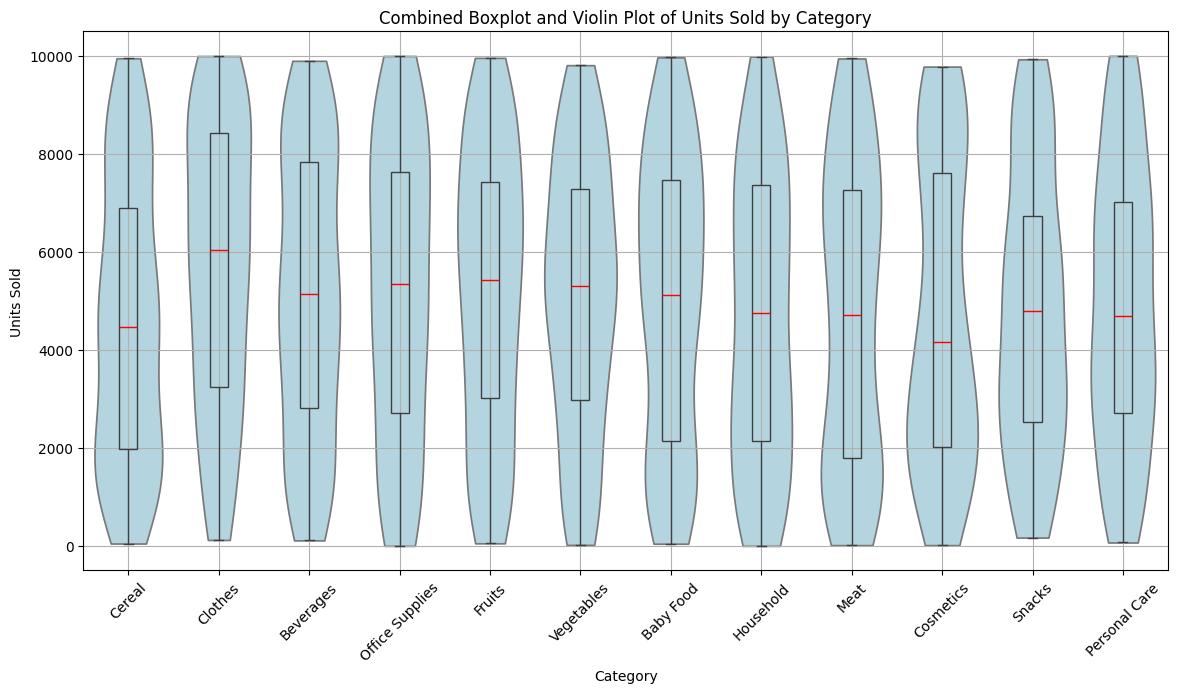

In [261]:
plt.figure(figsize=(14, 7))

# Violin plot (напівпрозорий)
sns.violinplot(data=df_union, x='category', y='units_sold', inner=None, cut=0, color='lightblue')

# Boxplot поверх Violin plot
sns.boxplot(data=df_union, x='category', y='units_sold', width=0.2, boxprops={'zorder': 2, 'facecolor': 'none'}, medianprops={'color': 'red'})

plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Units Sold")
plt.title("Combined Boxplot and Violin Plot of Units Sold by Category")
plt.grid(True)
plt.show()


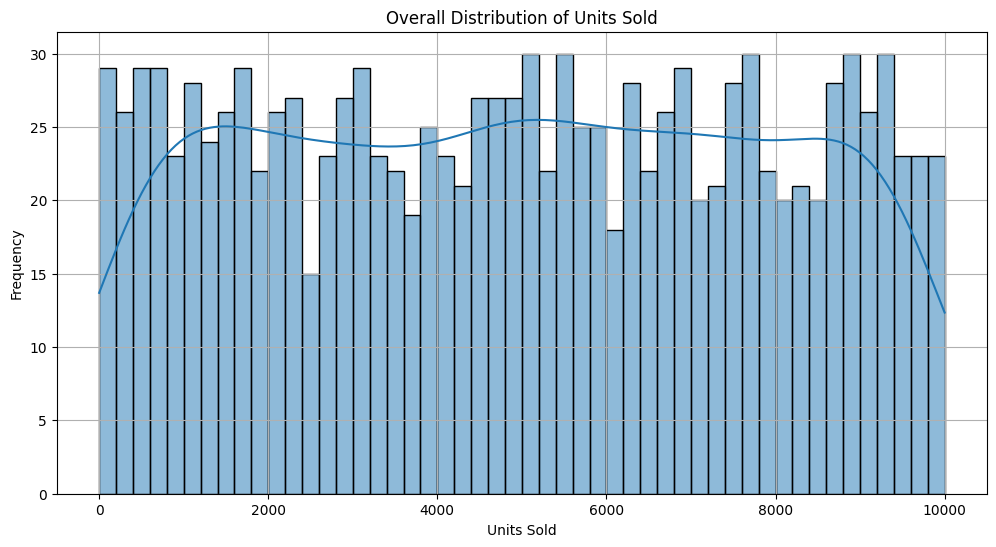

In [262]:
# розподіл units sold
plt.figure(figsize=(12, 6))
sns.histplot(df_union['units_sold'], bins=50, kde=True)
plt.xlabel("Units Sold")
plt.ylabel("Frequency")
plt.title("Overall Distribution of Units Sold")
plt.grid(True)
plt.show()


По розподілу units sold помітно, що є замовлення з невеликою кількість одиниць, але більшість замовлень включає більше 2000 одиниць і в одному замовленні тільки товари одної категорії. Це свідчить що більшість замовлень оптові B2B. Це варто врахувати в подальшому аналізі.

### Аналіз продажів по категоріях

#### Діаграми аналізу продажів по категоріях

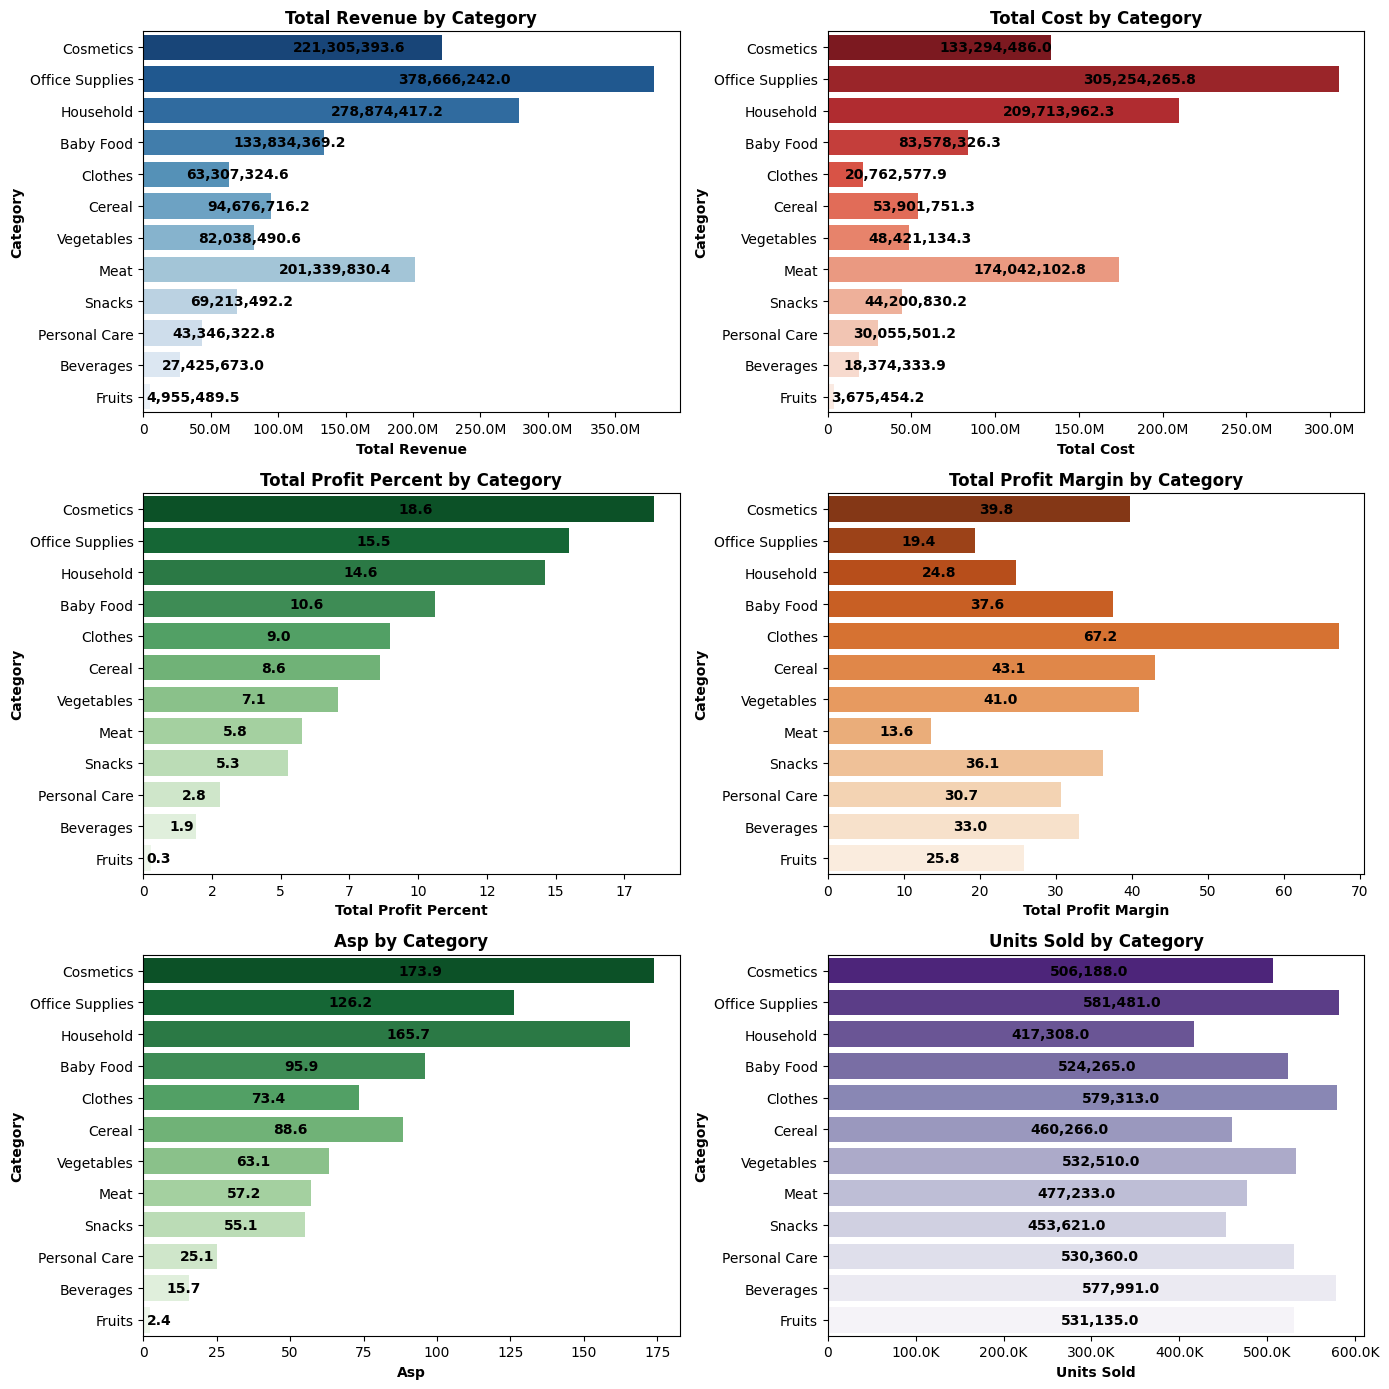

In [263]:
#Аналіз продажів

# Групування за категоріями товарів
category_sales = df_union.groupby('category')[['total_revenue', 'total_cost', 'total_profit', 'units_sold','sales_channel']].sum().reset_index()

# Додаємо метрики в датафрейм
category_sales['total_profit_margin'] = category_sales['total_profit'] / category_sales['total_revenue'] * 100
category_sales['asp'] = category_sales['total_profit'] / category_sales['units_sold']
category_sales['total_profit_percent'] = category_sales['total_profit'] / category_sales['total_profit'].sum() * 100
# Функція для форматування чисел (тис., млн, млрд)
def format_large_numbers(x, pos):
    if x >= 1_000_000_000:
        return f'{x/1_000_000_000:.1f}B'
    elif x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x/1_000:.1f}K'
    return str(int(x))

# Створення графіків
fig, axes = plt.subplots(3, 2, figsize=(14, 14))

# Створення dict для top-5 по кожній метриці
top_5_categories = {}

# Сортування за total_profit в порядку спадання
category_sales = category_sales.sort_values('total_profit', ascending=False)

# Візуалізація
metrics = ['total_revenue', 'total_cost', 'total_profit_percent', 'total_profit_margin', 'asp', 'units_sold']
palettes = ['Blues_r', 'Reds_r', 'Greens_r', 'Oranges_r', 'Greens_r', 'Purples_r']

for ax, metric, palette in zip(axes.flat, metrics, palettes):


    top_5_categories[f"by_{metric}"] = category_sales.nlargest(5, metric)[['category', metric]].values.tolist()

    sns.barplot(data=category_sales, x=metric, y='category', ax=ax, hue='category', palette=palette, legend=False)
    ax.set_title(f"{metric.replace('_', ' ').title()} by Category", fontweight='bold')
    ax.set_xlabel(metric.replace("_", " ").title(), fontweight='bold')
    ax.set_ylabel("Category", fontweight='bold')


    # Форматування підписів осі X
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_large_numbers))

    # Додавання підписів значень
    for p in ax.patches:
        value = p.get_width()


        if value > 1000000 or metric in ['units_sold','total_profit_percent', 'total_profit_margin','asp'] :  # Додаємо підпис тільки для значних значень
            text_x = p.get_x() + p.get_width()/2 # Зсув праворуч


        else:
            text_x = p.get_x() + p.get_width()*1.1  # Щоб не заходило на назви


        ax.annotate(f'{value:,.1f}',
                    (text_x, p.get_y() + p.get_height() / 2.),
                    ha='left', va='center', fontsize=10, fontweight='bold', color='black')


plt.tight_layout()
plt.show()



#### Аналіз діаграм продажів по категоріях.
##### Топ-5 категорій за різними метриками:
* Топ-5 категорій за доходом:<br>Office Supplies, Household, Cosmetics, Meat, Baby Food.
* Топ-5 категорій за витратами:<br>Office Supplies, Household, Meat, Cosmetics, Baby Food.
* Топ-5 категорій за прибутком:<br>Cosmetics, Office Supplies, Household, Baby Food, Clothes.
* Топ-5 категорій за маржинальним прибутком:<br>Clothes, Cereal, Vegetables, Cosmetics, Baby Food.
* Топ-5 категорій за популярністю:<br>Office Supplies, Clothes, Beverages, Vegetables, Fruits.
* Топ-5 категорій за ASP:<br>Cosmetics, Household, Office Supplies, Baby Food, Cereal.
#### Опис діаграм:
Так як прибуток є ключовою метрикою, всі діаграми відсортовані за прибутком у порядку спадання. Інтенсивність кольорів відображає прибуток від максимального до мінімального на всіх діаграмах. Це дає змогу візуально оцінити на що варто звернути увагу.
### Аналіз діаграм:
Розглядаємо категорії в порядку спадання прибутку:
* Cosmetics - лідер за пибутком і прибутком на одиницю, з високою маржинальністю 40%. Знаходиться на 3 місці за доходом. Не входить в Топ за популярністю. Зі значним ASP. Варто звернути на це увагу враховуючи загальну тенденцію росту популярності косметики. Проаналізувати маркетингову стратегію, перерозподілити або збільшити бюджет для росту продажів в даній категорії, це може значно збільшити прибуток. Варто провести додатковий аналіз в розрізі суб регіонів, країн та каналів продажу.
* Office Supplies - на другому місці за прибутком, лідер за доходом і витратами, з досить низькою маржинальністю 19%. Лідер за популярністю і прибутком на одиницю. Варто проаналізувати витрати, якщо є можливість, то оптимізувати їх. Також варто переглянути цінову політику, враховуючи конкуренцію. Можливо підвищення ціни призведе до росту прибутку.
* Household - на 3 місці за прибутком з маржинальністю 25%. На 3 місці за прибутком на одиницю. Не входить в Топ за популярністю. Варто проаналізувати витрати і оптимізувати при можливості для збільшення маржинальності. Також варто проаналізувати маркетингову стратегію, перерозподілити або збільшити бюджет для росту продажів в даній категорії.
* Baby Food - на 4 місці за прибутком з маржинальністю 38%. На 4 місці за прибутком на одиницю. Не входить в Топ за популярністю. Варто проаналізувати маркетингову стратегію, перерозподілити або збільшити бюджет для росту продажів в даній категорії.
* Clothes - на п'ятому місці за прибутком з найвищою маржинальністю 67%. Не входить в Топ за доходом. На 4 місці за популярністю. Враховуючи високу маржинальність варто проаналізувати маркетингову стратегію, перерозподілити або збільшити бюджет для росту продажів в даній категорії. Висока маржинальність дозволяє використати акції та дисконти для збільшення продажів.
* Варто звернути увагу на категорії Cereal та Vegetables що входять в Топ за маржинальним прибутком 43% та 41% відповідно, та знаходяться на 6 та 7 місці за прибутком. Проаналізувати маркетингову стратегію, перерозподілити або збільшити бюджет для росту продажів в даних категоріях.
#### Висновки:
* Маємо категорії з низькою маржею і високим прибутком за рахунок великих обʼємів: Office Supplies, Household.
* Маємо категорії з високою маржею і високим прибутком: Cosmetics, Clothes.
* Маємо категорії з високою маржею і низьким прибутком: Cereal, Vegetables.
#### Рекомендації:
* Проаналізувати та за можливості оптимізувати витрати для категорій: Office Supplies, Household. Переглянути цінову політику, з урахуванням конкуренції. Можливо збільшення ціни приведе до збільшення прибутку.
* Проаналізувати маркетингову стратегію, перерозподілити або збільшити бюджет для росту продажів в категоріях: Cosmetics, Household, Baby Food, Clothes, Cereal, Vegetables.
* Категорія Clothes має дуже високу маржу 67%, варто застосувати акції та дисконти для збільшення обʼємів продажів.
* Застосувати AB тестування, якщо є можливість, для перевірки гіпотези та виявлення категорій в яких виростуть прибутки зі збільшення бюджету на просування.
* Провести повторний аналіз після застосування змін.



In [264]:
print(top_5_categories["by_total_revenue"])
print(top_5_categories["by_total_cost"])
print(top_5_categories["by_total_profit_percent"])
print(top_5_categories["by_total_profit_margin"])
print(top_5_categories["by_units_sold"])
print(top_5_categories["by_asp"])


[['Office Supplies', 378666242.01000005], ['Household', 278874417.15999997], ['Cosmetics', 221305393.6], ['Meat', 201339830.37], ['Baby Food', 133834369.2]]
[['Office Supplies', 305254265.76000005], ['Household', 209713962.32], ['Meat', 174042102.77], ['Cosmetics', 133294486.03999999], ['Baby Food', 83578326.3]]
[['Cosmetics', 18.579106803156613], ['Office Supplies', 15.497271704074977], ['Household', 14.599775330702764], ['Baby Food', 10.609053064321346], ['Clothes', 8.981198071219241]]
[['Clothes', 67.20351390922401], ['Cereal', 43.067574137092855], ['Vegetables', 40.97754121770738], ['Cosmetics', 39.76898444647758], ['Baby Food', 37.550924475086184]]
[['Office Supplies', 581481.0], ['Clothes', 579313.0], ['Beverages', 577991.0], ['Vegetables', 532510.0], ['Fruits', 531135.0]]
[['Cosmetics', 173.87], ['Household', 165.72999999999996], ['Office Supplies', 126.25], ['Baby Food', 95.86000000000001], ['Cereal', 88.58999999999999]]


### Географічний аналіз

#### Діаграма прибутку за регіонами

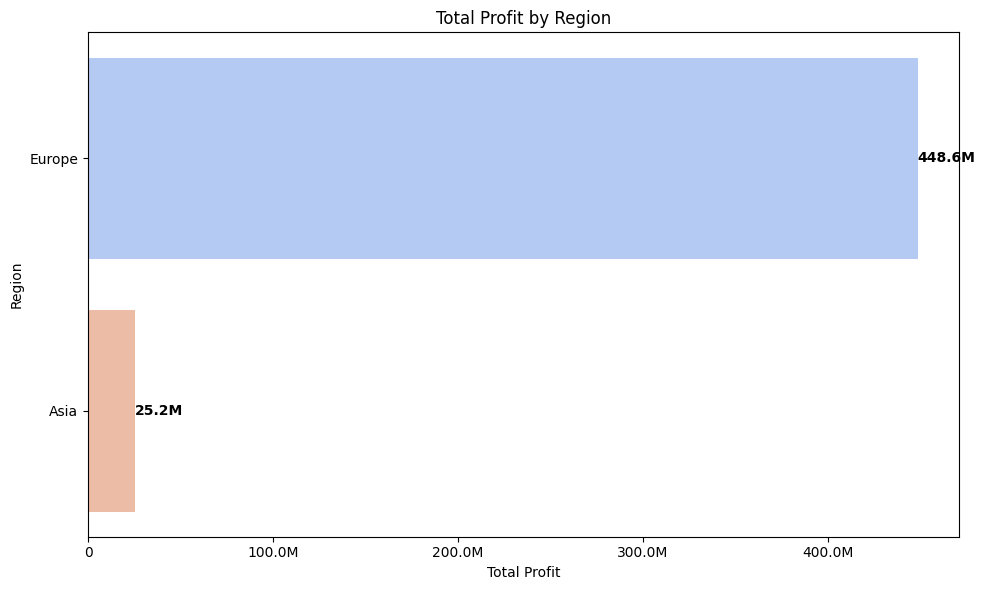

In [265]:
# Групування за регіонами
region_sales = df_union.groupby('region')[['total_revenue', 'total_profit']].sum().reset_index()

# Сортування за тотал профіт в порядку спадання
region_sales = region_sales.sort_values('total_profit', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=region_sales, x='total_profit', y='region', hue='region', palette='coolwarm', legend=False)
plt.title("Total Profit by Region")
plt.xlabel("Total Profit")
plt.ylabel("Region")

# Використання функції для форматування чисел на осі X
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_large_numbers))

# Додавання підписів значень на стовпчиках
for p in ax.patches:
    value = p.get_width()
    ax.annotate(format_large_numbers(value, None),
                (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, fontweight='bold', color='black')

plt.tight_layout()
plt.show()

#### Аналіз діаграми прибутку за регіонами
З цієї діаграми ми бачимо, що охоплено в основному Європейський регіон.

#### Діаграми аналізу продажів по суб-регіонах

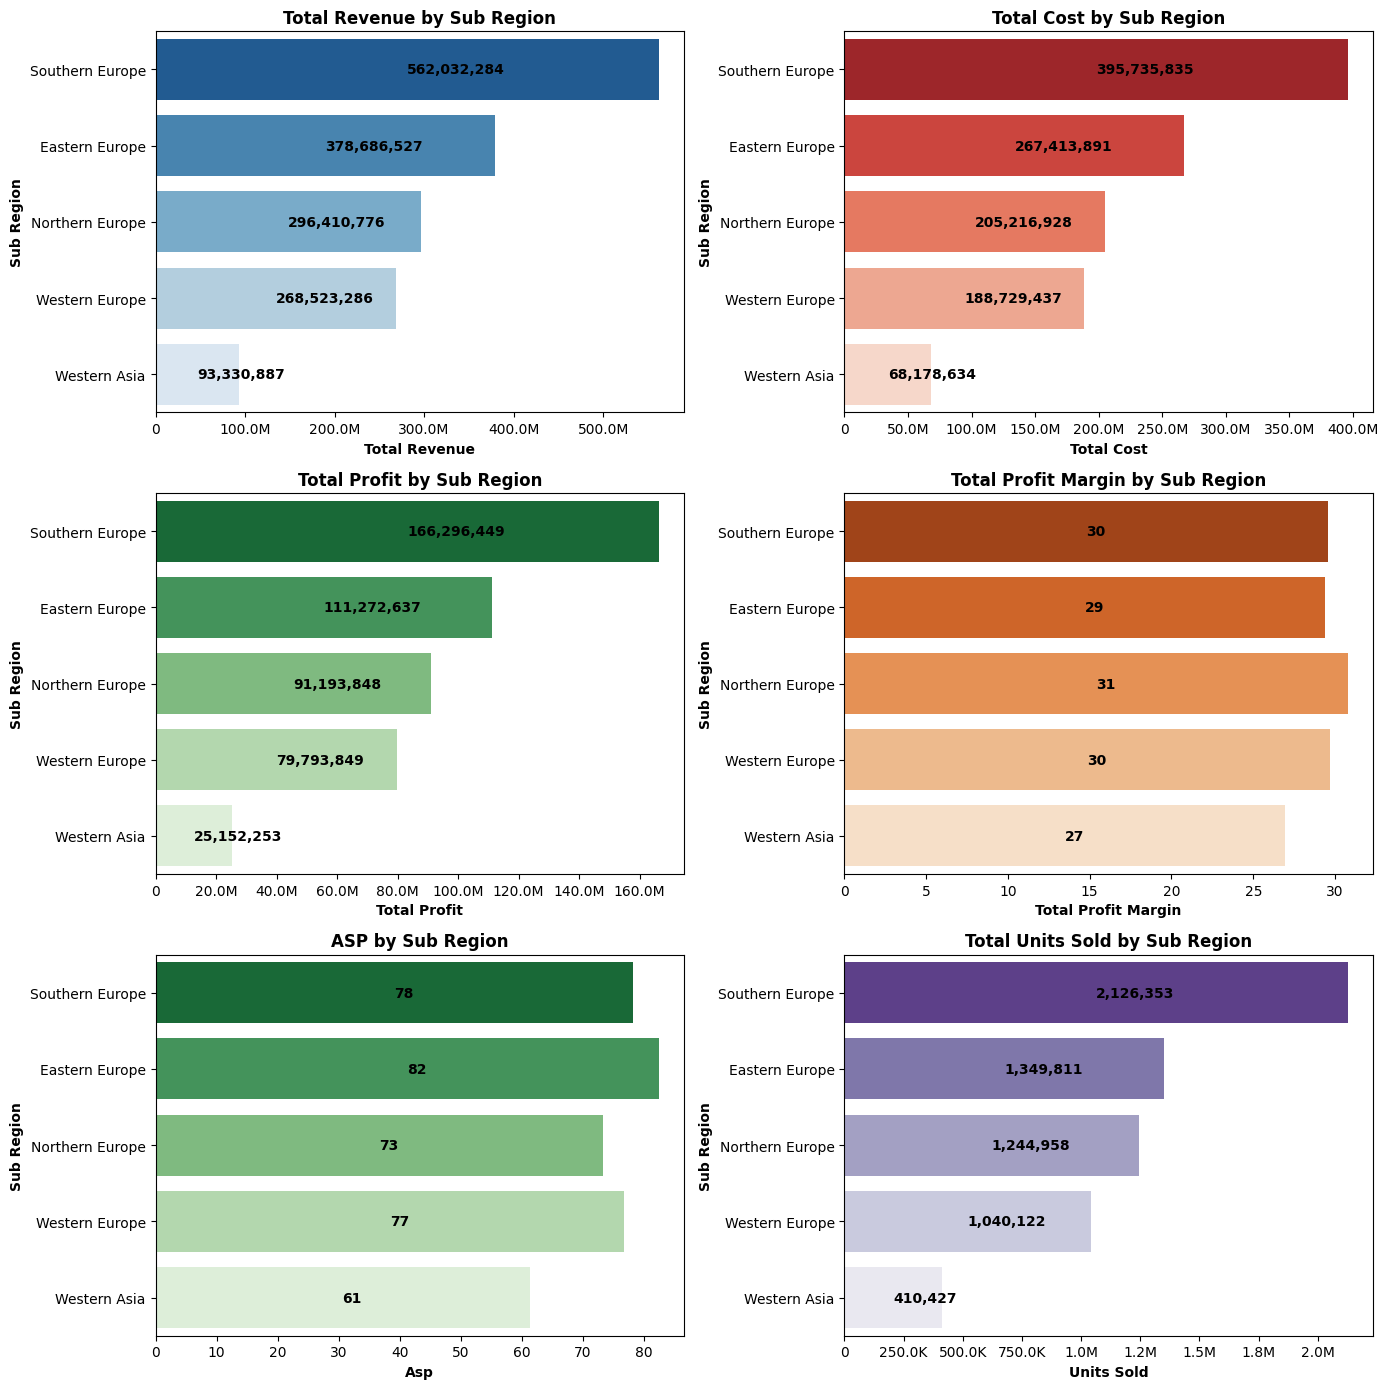

In [266]:
# Групування за суб регіонами
sub_region_sales = df_union.groupby('sub_region')[['total_revenue', 'total_cost', 'total_profit', 'units_sold', 'sales_channel']].sum().reset_index()

# Додаємо метрики в датафрейм
sub_region_sales['total_profit_margin'] = sub_region_sales['total_profit'] / sub_region_sales['total_revenue'] * 100
sub_region_sales['asp'] = sub_region_sales['total_profit'] / sub_region_sales['units_sold']

# Створення графіків
fig, axes = plt.subplots(3, 2, figsize=(14, 14))

# Сортування за тотал профіт в порядку спадання
sub_region_sales = sub_region_sales.sort_values('total_profit', ascending=False)

# Візуалізація
metrics = ['total_revenue', 'total_cost', 'total_profit', 'total_profit_margin', 'asp', 'units_sold']
titles = ['Total Revenue by Sub Region', 'Total Cost by Sub Region', 'Total Profit by Sub Region',
          'Total Profit Margin by Sub Region', 'ASP by Sub Region', 'Total Units Sold by Sub Region']
palettes = ['Blues_r', 'Reds_r', 'Greens_r', 'Oranges_r', 'Greens_r', 'Purples_r']

for ax, metric, title, palette in zip(axes.flat, metrics, titles, palettes):

    sns.barplot(data=sub_region_sales, x=metric, y='sub_region', ax=ax, hue='sub_region', palette=palette, legend=False)
    ax.set_title(title, fontweight='bold')
    ax.set_xlabel(metric.replace("_", " ").title(), fontweight='bold')
    ax.set_ylabel("Sub Region", fontweight='bold')

    # Форматування підписів осі X
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_large_numbers))

    # Додавання підписів значень
    for p in ax.patches:
        value = p.get_width()

        if value > 1000000 or metric in ['units_sold', 'total_profit_margin', 'asp'] :  # Додаємо підпис тільки для значних значень
            text_x = p.get_x() + p.get_width()/2 # Зсув праворуч

        else:
            text_x = p.get_x() + p.get_width()*1.1  # Щоб не заходило на назви


        ax.annotate(f'{value:,.0f}',
                    (text_x, p.get_y() + p.get_height() / 2.),
                    ha='left', va='center', fontsize=10, fontweight='bold', color='black')

plt.tight_layout()
plt.show()

#### Аналіз діаграм продажів по суб-регіонах
З цих діаграм помітно що суб регіони мають різне охоплення. Найбільш прибутковий суб_регіон Південна Європа. Маржинальність і ASP майже рівні.

#### Діаграми продажів по країнах

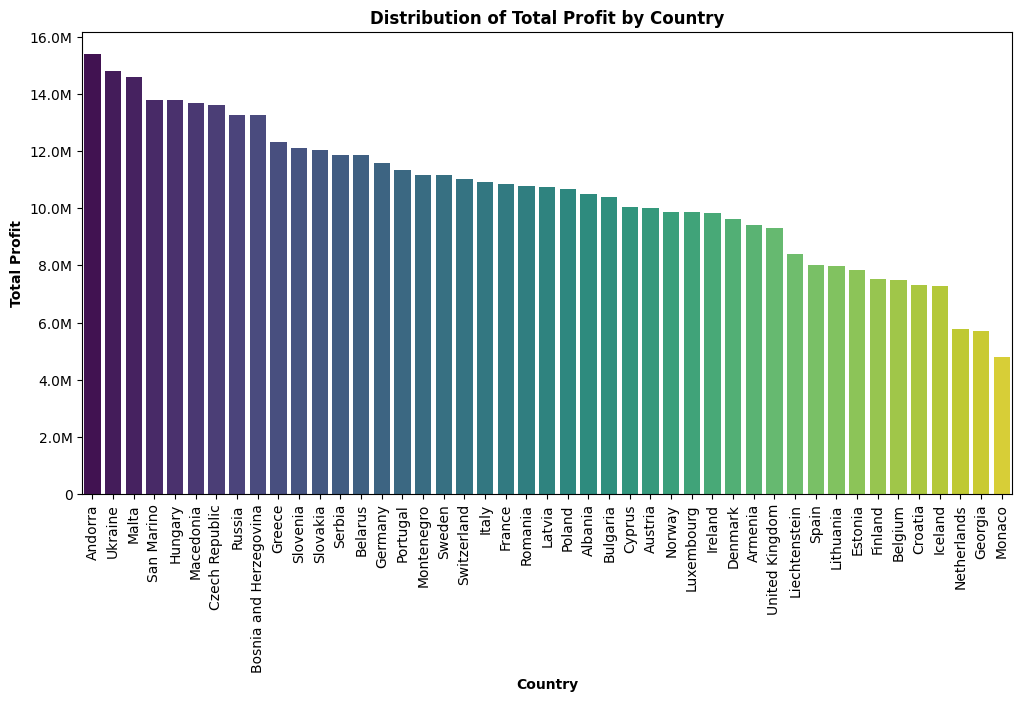

In [288]:


# Групуємо дані по країнах та рахуємо загальний прибуток
country_profit = df_union.groupby('country')['total_profit'].sum().reset_index()

# Сортуємо за прибутком
country_profit = country_profit.sort_values(by='total_profit', ascending=False)

# Побудова гістограми
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=country_profit, x='country', y='total_profit', hue='country', palette='viridis')

# Форматування значень по осі Y
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_large_numbers))

# Налаштування підписів
plt.xticks(rotation=90)  # Повертаємо назви країн для кращої читабельності
plt.xlabel("Country", fontweight='bold')
plt.ylabel("Total Profit", fontweight='bold')
plt.title("Distribution of Total Profit by Country", fontweight='bold')

# Відображення графіка
plt.show()


Прибуток по країнах не пов'язаний з розміром країни і кількістю населення.

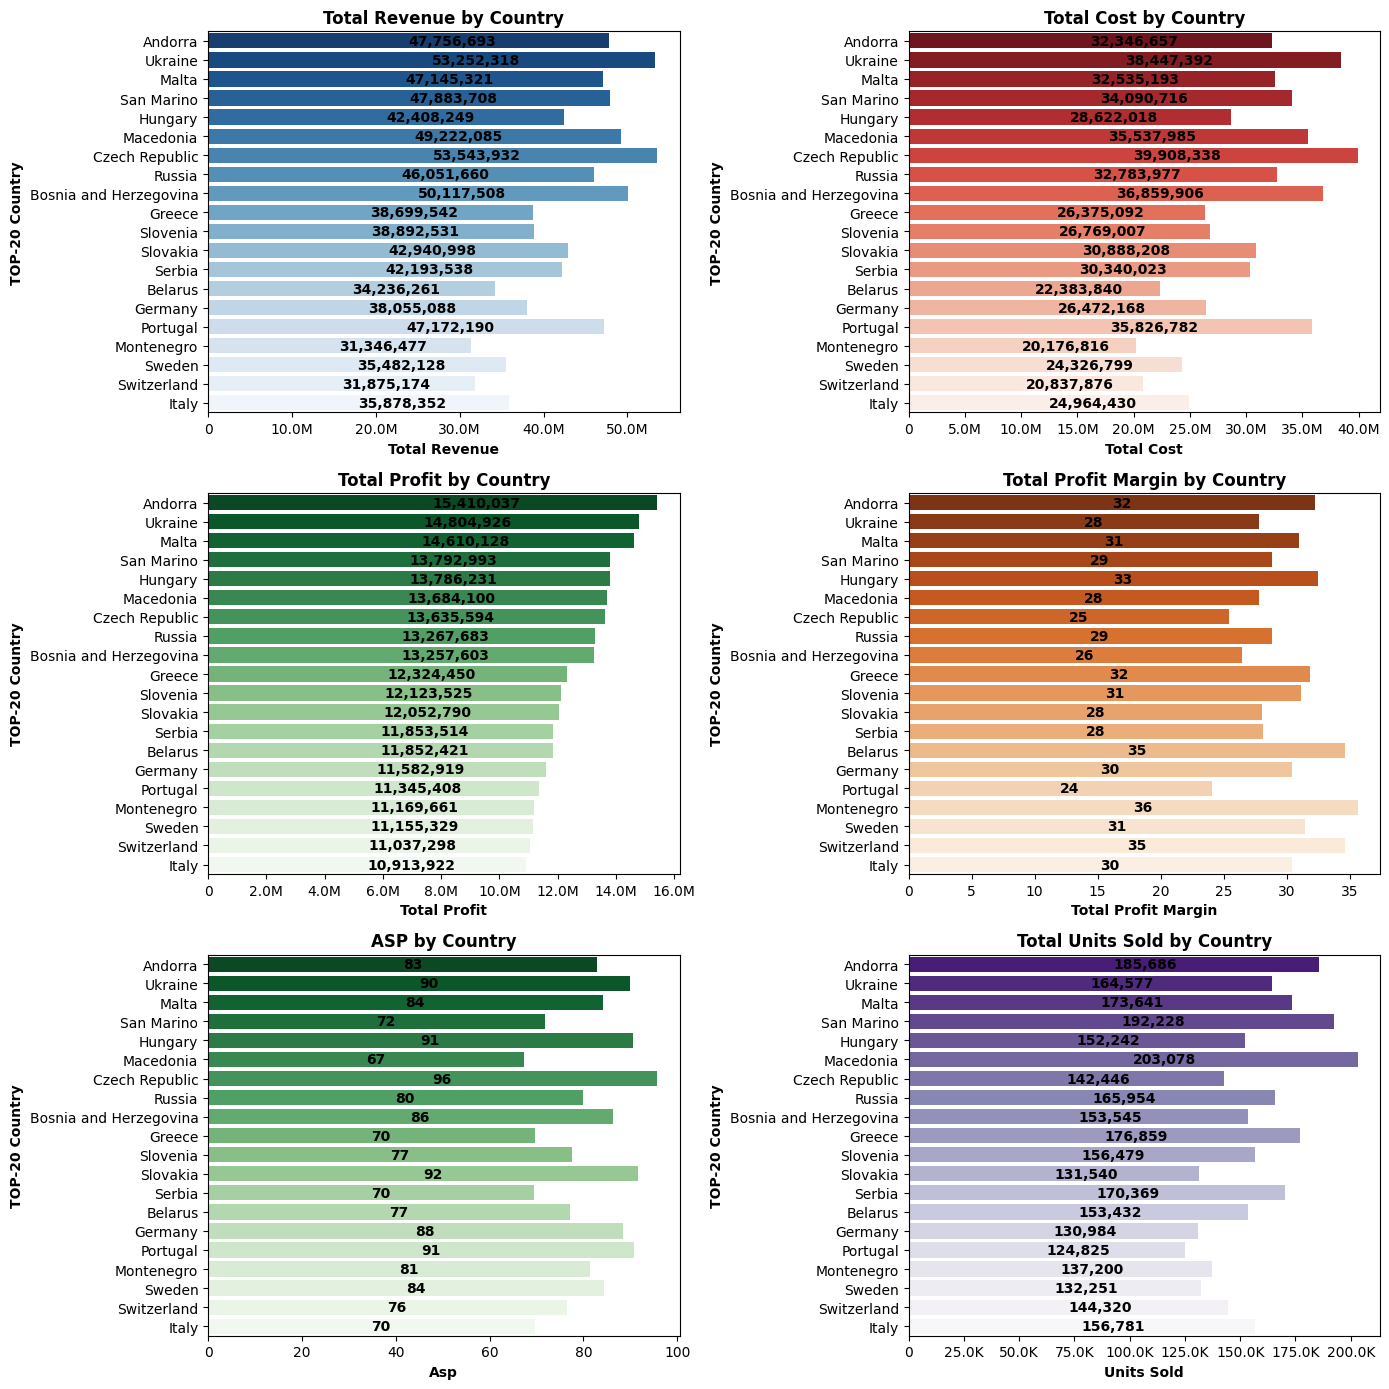

In [285]:
# Групування за країнами
country_sales = df_union.groupby('country')[['total_revenue', 'total_cost', 'total_profit', 'units_sold']].sum().reset_index()

# Додаємо метрики в датафрейм
country_sales['total_profit_margin'] = country_sales['total_profit'] / country_sales['total_revenue'] * 100
country_sales['asp'] = country_sales['total_profit'] / country_sales['units_sold']


# Створення графіків
fig, axes = plt.subplots(3, 2, figsize=(14, 14))

# Створення dict для top-10 по кожній метриці
top_10_countries = {}

country_sales = country_sales.sort_values('total_profit', ascending=False).head(20)
# Візуалізація
metrics = ['total_revenue', 'total_cost', 'total_profit', 'total_profit_margin', 'asp', 'units_sold']
titles = ['Total Revenue by Country', 'Total Cost by Country', 'Total Profit by Country', 'Total Profit Margin by Country', 'ASP by Country', 'Total Units Sold by Country']
palettes = ['Blues_r', 'Reds_r', 'Greens_r', 'Oranges_r', 'Greens_r', 'Purples_r']

for ax, metric, title, palette in zip(axes.flat, metrics, titles, palettes):


    top_10_countries[f"by_{metric}"] = country_sales.nlargest(10, metric)[['country', metric]].values.tolist() # заповнюємо словник Топ-10

    sns.barplot(data=country_sales, x=metric, y='country', ax=ax, hue='country', palette=palette, legend=False)
    ax.set_title(title, fontweight='bold')
    ax.set_xlabel(metric.replace("_", " ").title(), fontweight='bold')
    ax.set_ylabel("TOP-20 Country", fontweight='bold')

    # Форматування підписів осі X
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_large_numbers))

    # Додавання підписів значень
    for p in ax.patches:
        value = p.get_width()


        if value > 1000000 or metric in ['units_sold','total_profit_margin','asp'] :  # Додаємо підпис тільки для значних значень
            text_x = p.get_x() + p.get_width()/2 # Зсув праворуч


        else:
            text_x = p.get_x() + p.get_width()*1.1  # Щоб не заходило на назви


        ax.annotate(f'{value:,.0f}',
                    (text_x, p.get_y() + p.get_height() / 2.),
                    ha='left', va='center', fontsize=10, fontweight='bold', color='black')


plt.tight_layout()
plt.show()

#### Аналіз діаграм продажів по країнах
На діаграмах для Топ—20 країн помітно, що немає прямої залежності між прибутком і доходом. Але при цьому Топ-10 за прибутком і доходом співпадають на 90% займаючи різні позиції. Маржинальність в діапазоні 24% — 36%. ASP 67 — 96 USD.


#### Теплові карти продажів по країнах та категоріях

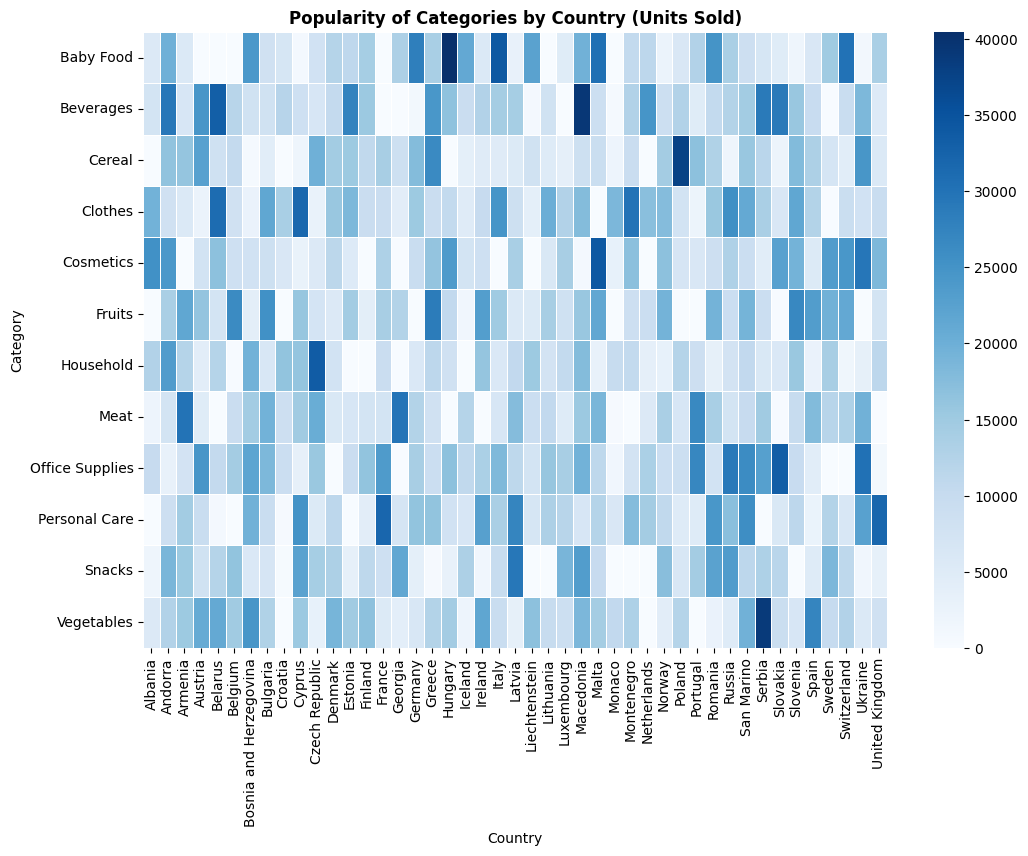

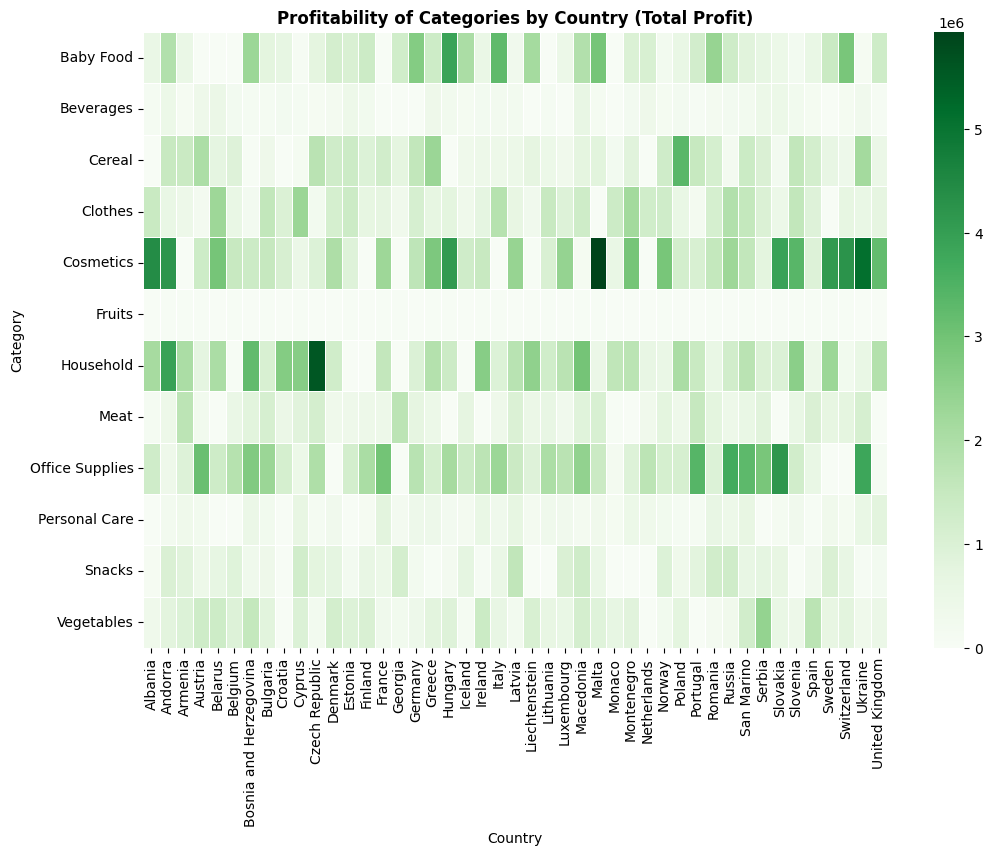

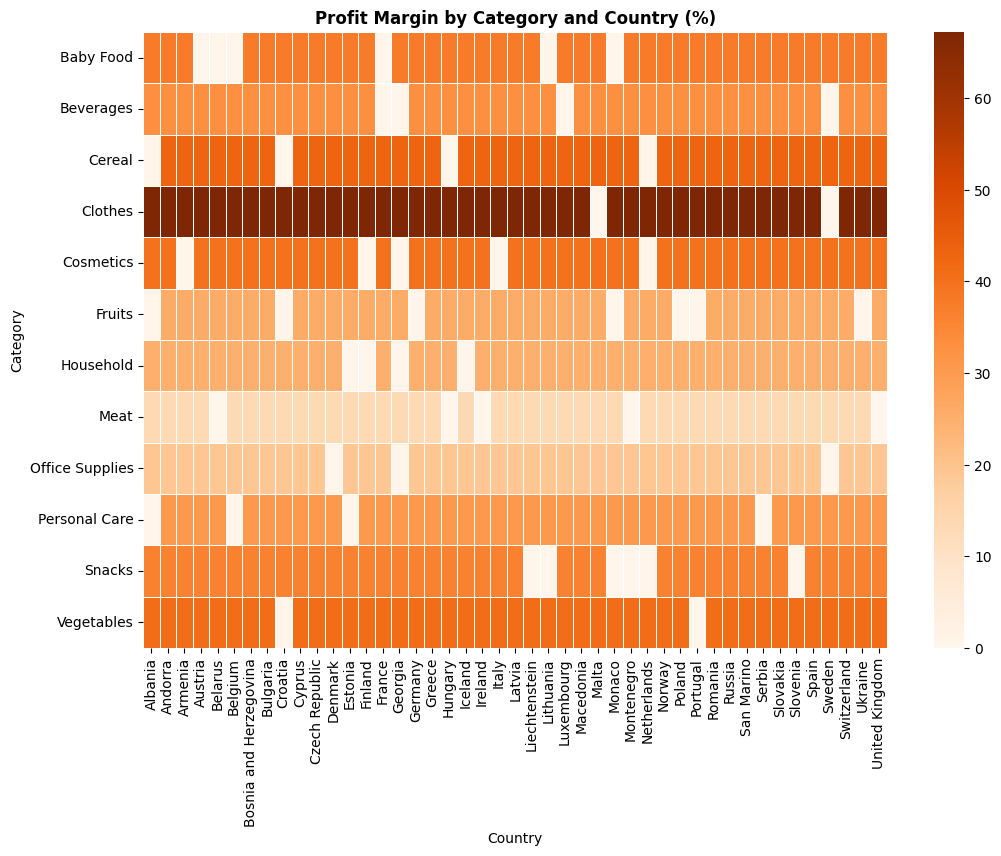

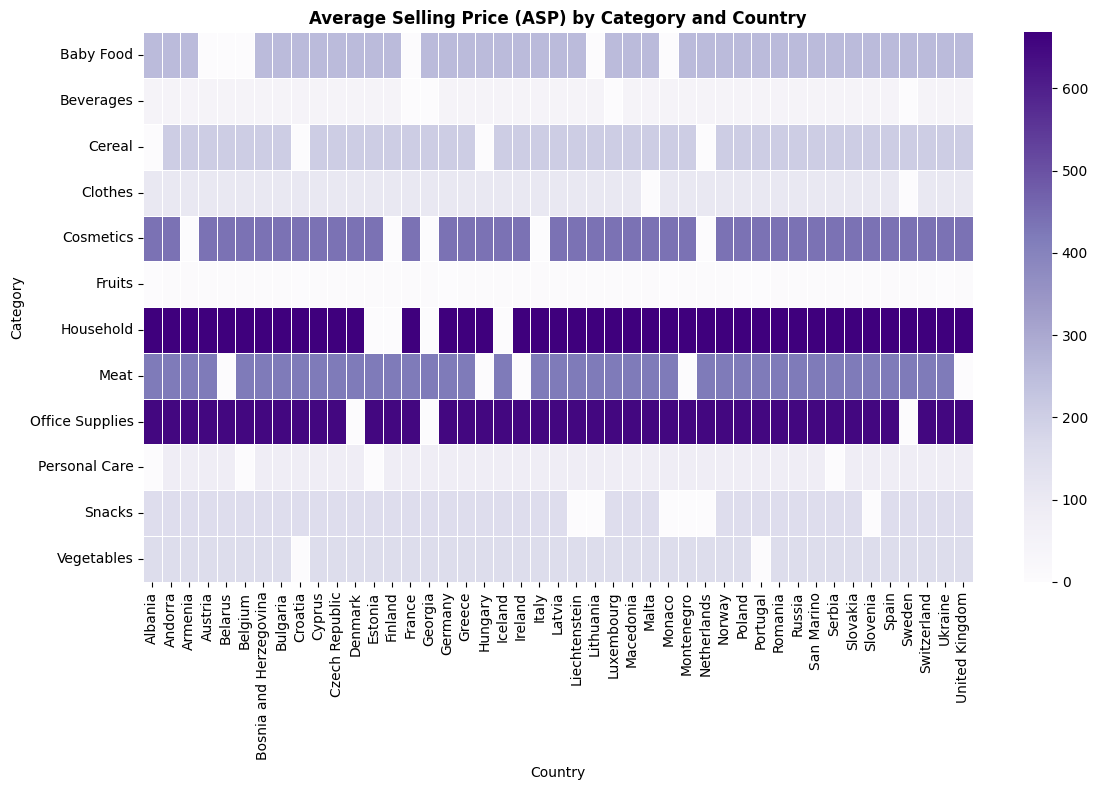

In [290]:

# Зведена таблиця для популярності категорій по країнах (units_sold)
popularity_pivot = df_union.pivot_table(values='units_sold', index='category', columns='country', aggfunc='sum').fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(popularity_pivot, cmap='Blues', linewidths=0.5)
plt.title('Popularity of Categories by Country (Units Sold)', fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Category')

# Зведена таблиця для прибутковості категорій по країнах (total_profit)
profit_pivot = df_union.pivot_table(values='total_profit', index='category', columns='country', aggfunc='sum').fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(profit_pivot, cmap='Greens', linewidths=0.5)
plt.title('Profitability of Categories by Country (Total Profit)', fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Category')

# Розрахунок маржинальності по країнах
margin_pivot = df_union.pivot_table(values='profit_margin', index='category', columns='country', aggfunc='mean').fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(margin_pivot, cmap='Oranges', linewidths=0.5)
plt.title('Profit Margin by Category and Country (%)', fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Category')


# Розрахунок ASP (Average Selling Price) по країнах
df_union['ASP'] = df_union['total_revenue'] / df_union['units_sold']
asp_pivot = df_union.pivot_table(values='ASP', index='category', columns='country', aggfunc='mean').fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(asp_pivot, cmap='Purples', linewidths=0.5)
plt.title('Average Selling Price (ASP) by Category and Country', fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Category')

plt.tight_layout()
plt.show()

#### Аналіз теплових карт продажів по країнах і категоріях
Ці діаграми підтверджують висновки з аналізу продажів по категоріях, а саме:
* Проаналізувати та оптимізувати витрати популярних категорій з низькою маржею, можливо переглянути цінову політику.
* Переглянути маркетингову стратегію категорій з високою маржею для збільшення продажів.
* Додатково варто проаналізувати чому деякі категорії популярніші в певних країнах, якщо причина в маркетингу, то варто перевірити застосування стратегії в інших країнах.
<br>
<br>Розглянемо країни з Топ за прибутком.

#####Андорра
* 71% продажів онлайн.
* Популярні категорії: Beverages, Cosmetics, Household, Baby Food
* Представлені всі категорії.
* Розподіл по категоріях досить рівномірний.
* Найбільш прибуткові категорії: Cosmetics, Household, Baby Food.

#####Україна
* 58% продажів онлайн.
* Популярні категорії: Office Supplies, Cosmetics, Cereal.
* Представлені всі категорії.
* Розподіл по категоріях досить рівномірний.
* Найбільш прибуткові категорії: Cosmetics, Office Supplies, Cereal.

#####Мальта
* 49% продажів онлайн.
* Популярні категорії: Cosmetics, Baby Food, Fruits.
* Представлені всі категорії.
* Розподіл по категоріях рівномірний.
* Найбільш прибуткові категорії: Cosmetics, Baby Food.

#####Сан Маріно
* 31% продажів онлайн.
* Популярні категорії: Office Supplies, Personal Care, Clothes.
* Представлені всі категорії.
* Розподіл по категоріях рівномірний.
* Найбільш прибуткові категорії: Office Supplies.

#####Угорщина
* 53% продажів онлайн.
* Популярні категорії: Baby Food, Cosmetics.
* Представлені майже всі категорії.
* Розподіл по категоріях досить рівномірний.
* Найбільш прибуткові категорії: Cosmetics, Baby Food.
<br>
<br>Для порівняння візьмемо іще декілька країн з низьким прибутком і різним розподілом по каналах.

#####Сполучене Королівство (Великобританія)
* 71% продажів онлайн.
* Популярні категорії: Personal Care, Cosmetics.
* Представлені всі категорії.
* Розподіл по категоріях нерівномірний.
* Найбільш прибуткові категорії: Cosmetics, Household.

#####Естонія
* 29% продажів онлайн.
* Популярні категорії: Beverages, Clothes.
* Представлені майже всі категорії.
* Розподіл по категоріях досить рівномірний.
* Найбільш прибуткові категорії: без явних переваг.
<br>

Проаналізувавши вибірку країн по теплових картах популярності та прибутковості можна зробити наступні висновки:
* Є побічний звʼязок між популярністю певних категорій і часткою онлайн/офлайн продажів в країні.
* Прибуток абсолютно не залежить від географічного положення країни та кількості населення.
* Не помічено закономірностей які б спростували попередні гіпотези.




In [286]:
#  max(country_sales['total_profit'])

print(top_10_countries['by_total_revenue'])
print(top_10_countries['by_total_cost'])
print(top_10_countries['by_total_profit'])
print(top_10_countries['by_units_sold'])
print(top_10_countries['by_total_profit_margin'])
print(top_10_countries['by_asp'])

[['Czech Republic', 53543932.14], ['Ukraine', 53252317.54], ['Bosnia and Herzegovina', 50117508.49], ['Macedonia', 49222085.25], ['San Marino', 47883708.48], ['Andorra', 47756693.17], ['Portugal', 47172189.84], ['Malta', 47145320.81], ['Russia', 46051659.81], ['Slovakia', 42940998.32]]
[['Czech Republic', 39908338.36], ['Ukraine', 38447391.8], ['Bosnia and Herzegovina', 36859905.72], ['Portugal', 35826782.25], ['Macedonia', 35537985.3], ['San Marino', 34090715.67], ['Russia', 32783977.17], ['Malta', 32535192.93], ['Andorra', 32346656.54], ['Slovakia', 30888208.290000003]]
[['Andorra', 15410036.629999999], ['Ukraine', 14804925.739999998], ['Malta', 14610127.88], ['San Marino', 13792992.809999999], ['Hungary', 13786231.030000001], ['Macedonia', 13684099.95], ['Czech Republic', 13635593.779999997], ['Russia', 13267682.64], ['Bosnia and Herzegovina', 13257602.77], ['Greece', 12324450.129999999]]
[['Macedonia', 203078.0], ['San Marino', 192228.0], ['Andorra', 185686.0], ['Greece', 176859.0]

#### Карта діаграма розподілу прибутку

In [271]:
# Побудова карти прибутку за країнами
fig = px.choropleth(
    country_sales,
    locations="country",  # Назви країн
    locationmode="country names",  # Визначаємо, що це країни
    color="total_profit",  # Колір залежить від прибутку
    title="Total Profit by Country",
    color_continuous_scale="Greens"
)

fig.show()

### Аналіз продажів по каналах

#### Діаграми продажів по каналах

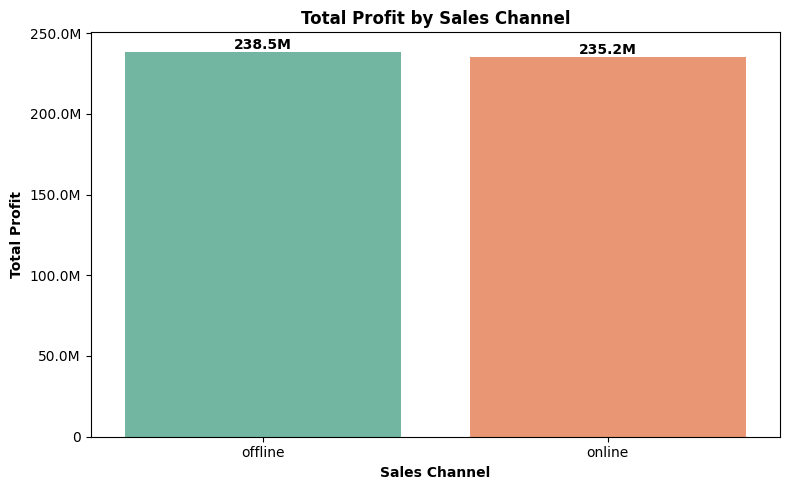

In [272]:



# Групування за каналами продажів
channel_sales = df_union.groupby('sales_channel')[['total_revenue', 'total_profit']].sum().reset_index()

# Побудова графіка
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=channel_sales, x='sales_channel', y='total_profit', hue='sales_channel', palette='Set2', legend=False)
plt.title("Total Profit by Sales Channel", fontweight='bold')
plt.xlabel("Sales Channel", fontweight='bold')
plt.ylabel("Total Profit", fontweight='bold')

# Форматування осі Y
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_large_numbers))

# Додавання підписів на стовпчики
for p in ax.patches:
    value = p.get_height()
    ax.annotate(format_large_numbers(value, None),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.tight_layout()
plt.show()


В загальному, прибуток в розрізі каналів продажу розподілений практично порівну.

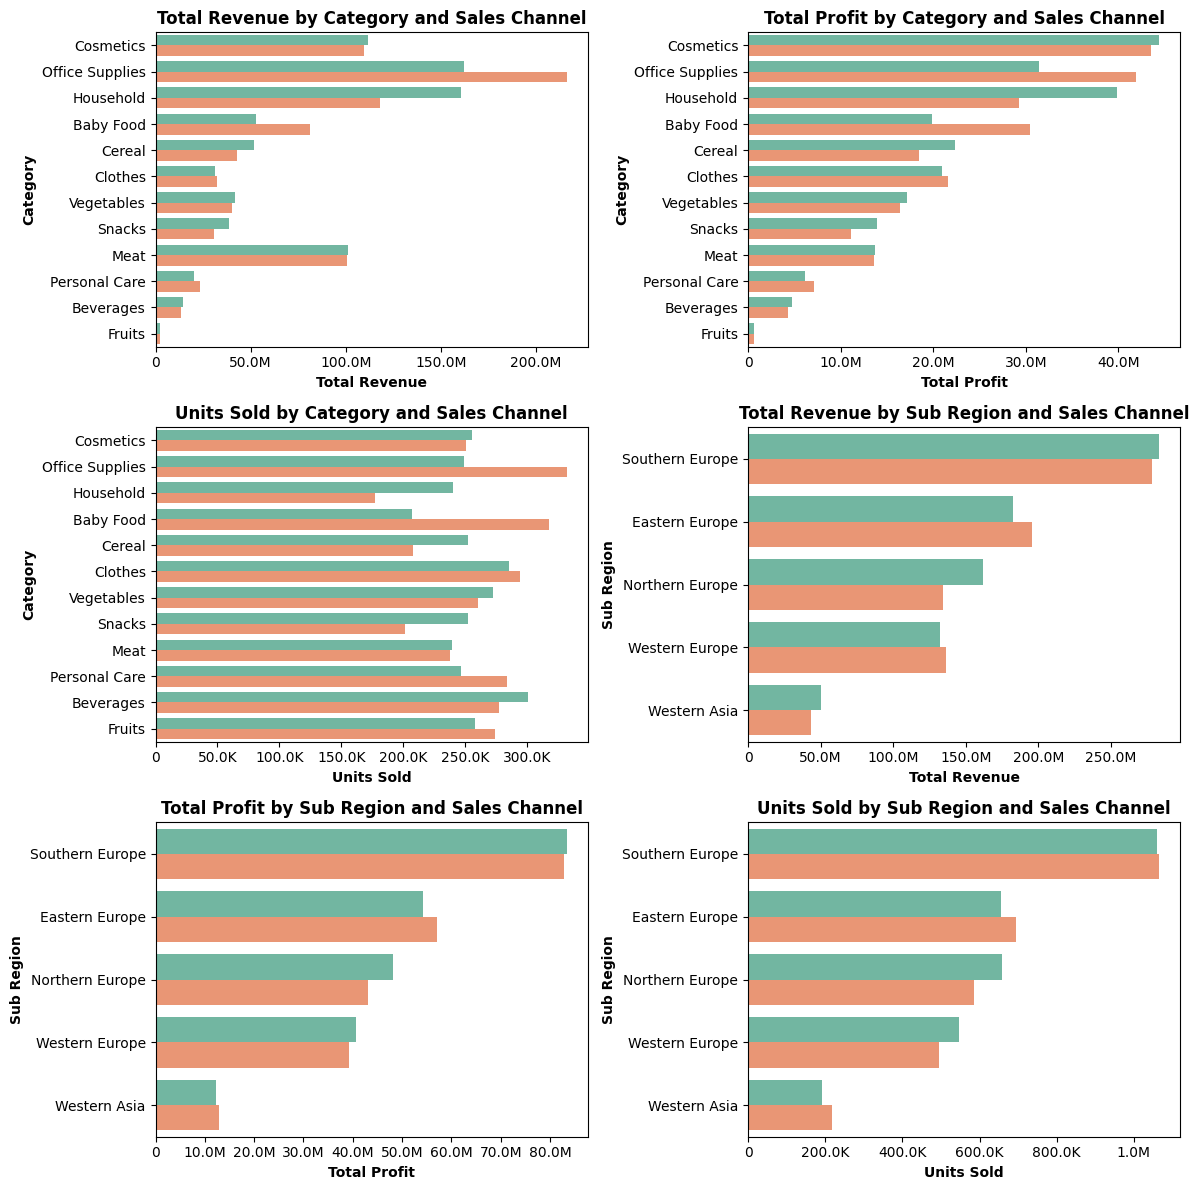

In [293]:
# Групуємо за суб регіонами і каналами продажу
sub_region_sales_channel = df_union.groupby(['sub_region', 'sales_channel'])[['total_profit', 'total_revenue', 'total_cost', 'units_sold']].sum().reset_index()

# сортуємо за прибутком
sub_region_sales_channel = sub_region_sales_channel.sort_values('total_profit', ascending=False)



# Групуємо за категоріями і каналами продажу
categories_sales_channel = df_union.groupby(['category', 'sales_channel'])[['total_profit', 'total_revenue', 'total_cost', 'units_sold']].sum().reset_index()

# сортуємо за прибутком
categories_sales_channel = categories_sales_channel.sort_values('total_profit', ascending=False)




#Створення графіків
fig, axes = plt.subplots(3, 2, figsize=(12, 12))


# Візуалізація
metrics = ['total_revenue', 'total_profit', 'units_sold', 'total_revenue', 'total_profit', 'units_sold', 'total_revenue', 'total_profit', 'units_sold']
ymetrics = ['category', 'category', 'category', 'sub_region','sub_region', 'sub_region']
datas = [categories_sales_channel, categories_sales_channel, categories_sales_channel, sub_region_sales_channel, sub_region_sales_channel, sub_region_sales_channel]

for ax, metric, ymetric, data in zip(axes.flat, metrics, ymetrics, datas):


    ax = sns.barplot(data=data, x=metric, y=ymetric, ax=ax, hue='sales_channel', palette='Set2', legend=False)

    # Форматування осі X
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_large_numbers))

    # Додавання підписів
    ax.set_title(f"{metric.replace('_', ' ' ).title()} by {ymetric.replace('_', ' ').title()} and Sales Channel", fontweight='bold')
    ax.set_xlabel(metric.replace("_", " ").title(), fontweight='bold')
    ax.set_ylabel(ymetric.replace("_", " ").title(), fontweight='bold')


plt.tight_layout()
plt.show()


In [274]:
df_union.head()

order_id order_date  ship_date order_priority  product_id sales_channel  \
0  100640618 2014-10-08 2014-10-18              M        2103        online   
1  100983083 2016-08-11 2016-08-11              C        2103       offline   
2  102230632 2017-05-13 2017-06-13              L        2455        online   
3  103435266 2012-08-11 2012-09-18              H        1270       offline   
4  103450715 2015-03-15 2015-04-18              H        8681        online   

   units_sold  unit_price  unit_cost         category     country  region  \
0       650.0      205.70     117.11           Cereal      Norway  Europe   
1      1993.0      205.70     117.11           Cereal      Serbia  Europe   
2      1171.0      109.28      35.84          Clothes  Montenegro  Europe   
3      7648.0       47.45      31.79        Beverages      Serbia  Europe   
4      2220.0      651.21     524.96  Office Supplies    Slovakia  Europe   

        sub_region  total_revenue  total_cost  total_profit  profit_margin  \
0  Northern Europe      133705.00    76121.50      57583.50      43.067574   
1  Southern Europe      409960.10   233400.23     176559.87      43.067574   
2  Southern Europe      127966.88    41968.64      85998.24      67.203514   
3  Southern Europe      362897.60   243129.92     119767.68      33.003161   
4   Eastern Europe     1445686.20  1165411.20     280275.00      19.386987   

      ASP  
0  205.70  
1  205.70  
2  109.28  
3   47.45  
4  651.21

#### Теплові карти продажів по каналах і категоріях

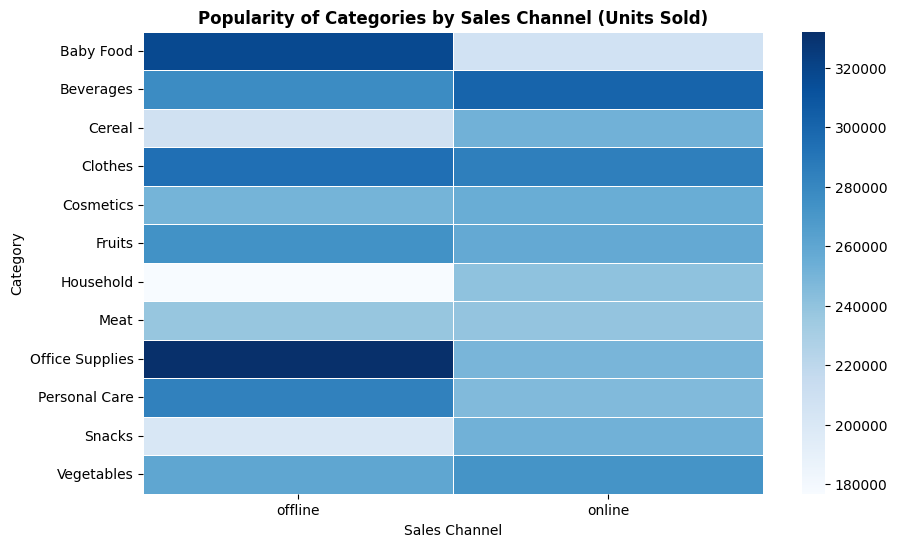

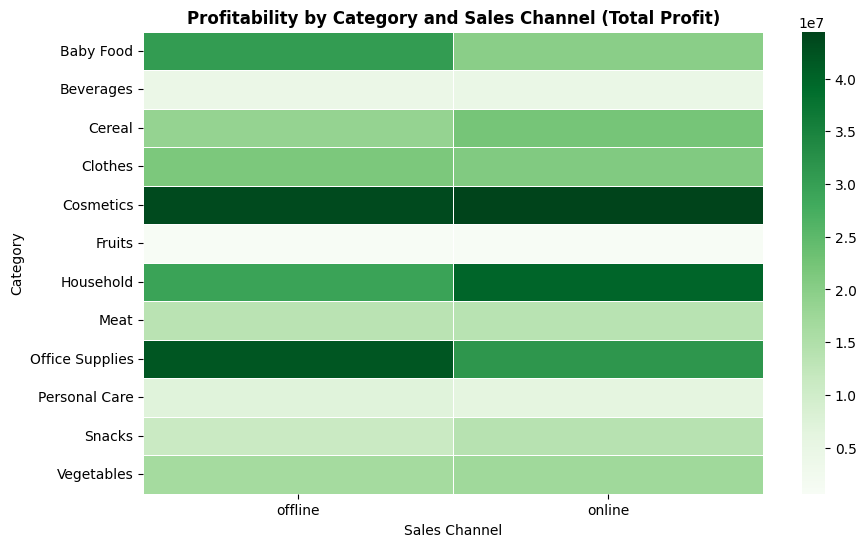

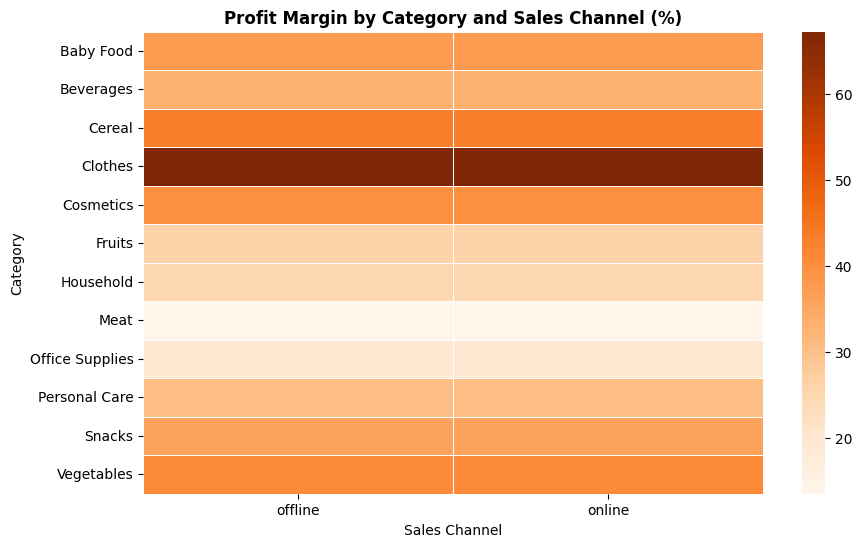

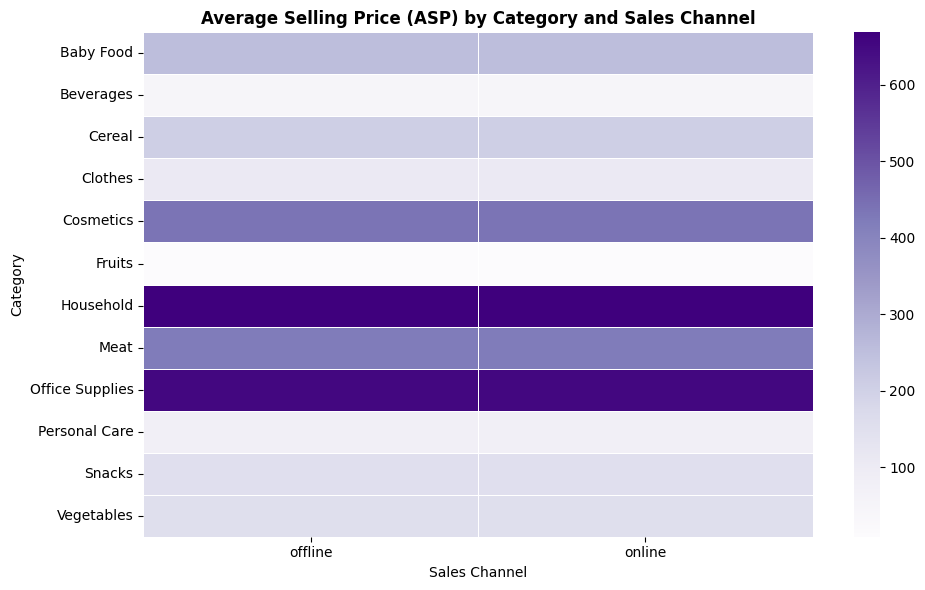

In [275]:

# Групування по категорії та sales_channel
channel_pivot = df_union.pivot_table(values='units_sold', index='category', columns='sales_channel', aggfunc='sum').fillna(0)

plt.figure(figsize=(10, 6))
sns.heatmap(channel_pivot, cmap='Blues', linewidths=0.5)
plt.title('Popularity of Categories by Sales Channel (Units Sold)', fontweight='bold')
plt.xlabel('Sales Channel')
plt.ylabel('Category')

# Прибутковість по каналах
profit_channel_pivot = df_union.pivot_table(values='total_profit', index='category', columns='sales_channel', aggfunc='sum').fillna(0)

plt.figure(figsize=(10, 6))
sns.heatmap(profit_channel_pivot, cmap='Greens', linewidths=0.5)
plt.title('Profitability by Category and Sales Channel (Total Profit)', fontweight='bold')
plt.xlabel('Sales Channel')
plt.ylabel('Category')


# Маржинальність по каналах продажу
margin_channel_pivot = df_union.pivot_table(values='profit_margin', index='category', columns='sales_channel', aggfunc='mean').fillna(0)

plt.figure(figsize=(10, 6))
sns.heatmap(margin_channel_pivot, cmap='Oranges', linewidths=0.5)
plt.title('Profit Margin by Category and Sales Channel (%)', fontweight='bold')
plt.xlabel('Sales Channel')
plt.ylabel('Category')


# ASP по каналах продажу
asp_channel_pivot = df_union.pivot_table(values='ASP', index='category', columns='sales_channel', aggfunc='mean').fillna(0)

plt.figure(figsize=(10, 6))
sns.heatmap(asp_channel_pivot, cmap='Purples', linewidths=0.5)
plt.title('Average Selling Price (ASP) by Category and Sales Channel', fontweight='bold')
plt.xlabel('Sales Channel')
plt.ylabel('Category')

plt.tight_layout()
plt.show()


#### Аналіз теплових карт продажів по каналах і категоріях
З цих діаграм помітно що є категорії які більш популярні офлайн: Offise Supplies та Baby Food, та ті які більш популярні онлайн: Beverages, Cereal, Cosmetics. Але при цьому вони достатньо популярні в обох каналах. Прибутковість рівномірно розподілена залежно від каналу продажу і не змінює ранжування категорій. Середній маржинальний прибуток і ASP однаковий в обох каналах. Це дає можливість провести перевірку гіпотез по каналу онлайн, що дозволить скоротити бюджет і отримати якісні дані по ефективності змін перш ніж застосувати їх глобально.

#### Діаграма розподілу прибутку по країнах і каналах

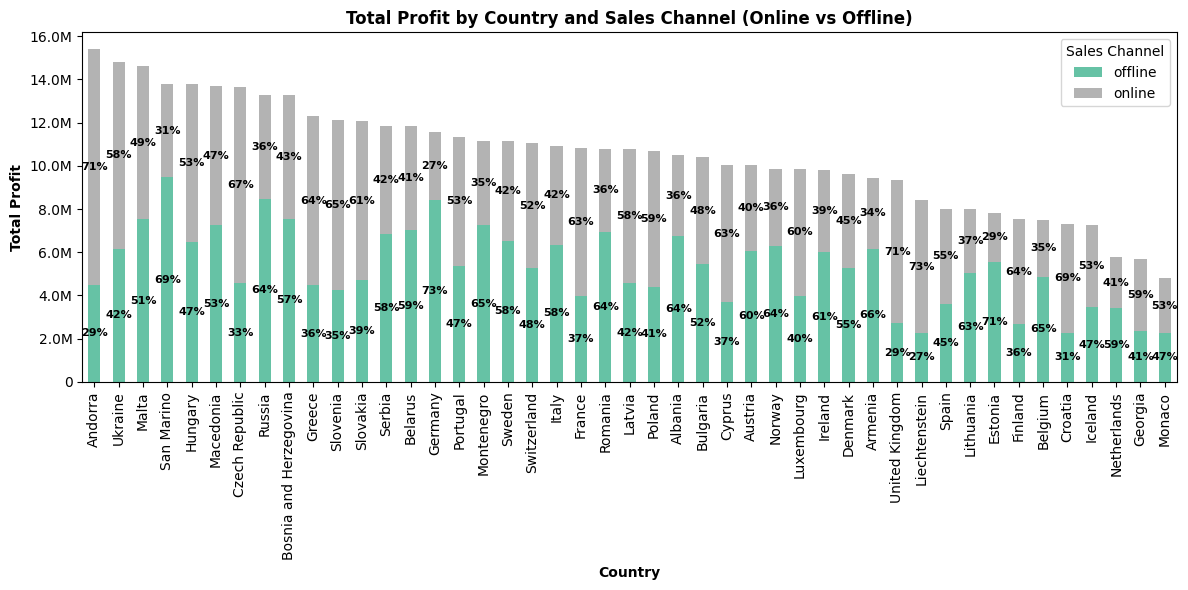

In [294]:


# Групуємо дані за країнами та каналами продажу
country_sales_channel = df_union.groupby(['country', 'sales_channel'])[['total_profit']].sum().reset_index()

# Обчислюємо загальний прибуток по країні
country_total = country_sales_channel.groupby('country')['total_profit'].sum().reset_index().rename(columns={'total_profit': 'total_profit_country'})

# Додаємо цей стовпець до основного датафрейму
country_sales_channel = country_sales_channel.merge(country_total, on='country')

# Обчислюємо відсотковий вміст online/offline
country_sales_channel['profit_pct'] = country_sales_channel['total_profit'] / country_sales_channel['total_profit_country'] * 100

# Перетворюємо таблицю для stacked bar chart
pivot_data = country_sales_channel.pivot(index='country', columns='sales_channel', values='total_profit').fillna(0)

# Відсортовуємо країни за загальним прибутком (від більшого до меншого)
pivot_data = pivot_data.loc[pivot_data.sum(axis=1).sort_values(ascending=False).index]

# Побудова stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))
pivot_data.plot(kind='bar', stacked=True, ax=ax, colormap='Set2')

# Додаємо підписи з відсотками
for i, country in enumerate(pivot_data.index):
    total = pivot_data.loc[country].sum()
    bottom = 0
    for channel in pivot_data.columns:
        value = pivot_data.loc[country, channel]
        pct = value / total * 100  # Відсоток від загального
        if pct > 5:  # Відображаємо тільки якщо більше 5%
            ax.text(i, bottom + value / 2, f'{pct:.0f}%', ha='center', va='center', fontsize=8, fontweight='bold')
        bottom += value

# Форматування осі Y
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_large_numbers))

# Налаштування підписів
ax.set_xticklabels(pivot_data.index, rotation=90)  # Назви країн вертикально
ax.set_xlabel("Country", fontweight='bold')
ax.set_ylabel("Total Profit", fontweight='bold')
ax.set_title("Total Profit by Country and Sales Channel (Online vs Offline)", fontweight='bold')
ax.legend(title="Sales Channel")

# Відображення графіка
plt.tight_layout()
plt.show()


#### Аналіз діаграми розподілу прибутку по країнах і каналах
На цій діаграмі помітно що є суттєва різниця в розподілі каналів продажу по країнах. Це не повʼязано з географією. Можливо це залежить від логістики, інфраструктури та ментальності. Цей розподіл не впливає на ранжування за прибутком. Перевірку гіпотез краще провести в Топ країнах за прибутком, це дасть можливість оцінити ефективність, а також порівняти чи збільшаться прибутки онлайн в країнах де вони зараз низькі  і чи призведе це до збільшення загального прибутку. В Топ-10 представлені країни з розподілом онлайн/офлайн від 71%/29% до 69%/31% це достатній діапазон для перевірки.
#### Топ-10:
Andorra, Ukraine, Malta, San Marino, Hungary, Macedonia, Czech Republic, Russia, Bosnia and Herzegovina, Greece.

In [295]:
top_10_countries['by_total_profit']

[['Andorra', 15410036.629999999],
 ['Ukraine', 14804925.739999998],
 ['Malta', 14610127.88],
 ['San Marino', 13792992.809999999],
 ['Hungary', 13786231.030000001],
 ['Macedonia', 13684099.95],
 ['Czech Republic', 13635593.779999997],
 ['Russia', 13267682.64],
 ['Bosnia and Herzegovina', 13257602.77],
 ['Greece', 12324450.129999999]]

### Аналіз інтервалу відвантаження

In [297]:
# Обчислюємо інтервал у днях
df_union['interval_days'] = (df_union['ship_date'] - df_union['order_date']).dt.days

df_union.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        1246 non-null   int64         
 1   order_date      1246 non-null   datetime64[ns]
 2   ship_date       1246 non-null   datetime64[ns]
 3   order_priority  1246 non-null   object        
 4   product_id      1246 non-null   int64         
 5   sales_channel   1246 non-null   object        
 6   units_sold      1246 non-null   float64       
 7   unit_price      1246 non-null   float64       
 8   unit_cost       1246 non-null   float64       
 9   category        1246 non-null   object        
 10  country         1246 non-null   object        
 11  region          1246 non-null   object        
 12  sub_region      1246 non-null   object        
 13  total_revenue   1246 non-null   float64       
 14  total_cost      1246 non-null   float64       
 15  tota

#### Діаграма розподілу інтервалу відвантаження по категоріях

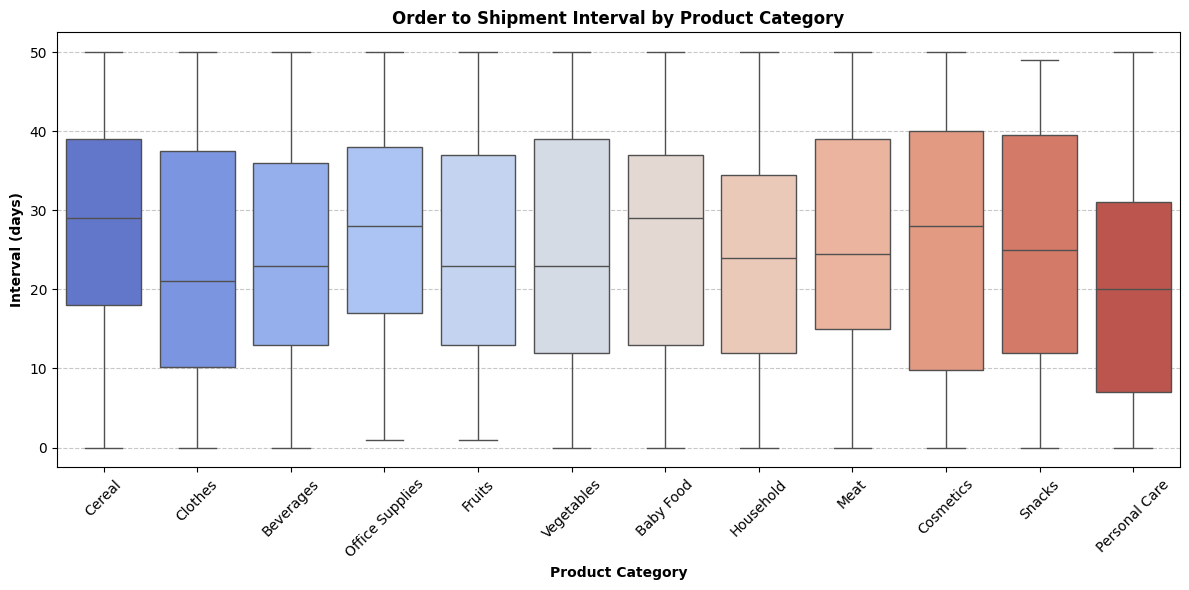

In [298]:
# Розподіл інтервалу відвантаження по категоріях
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=df_union, x='category', y='interval_days', hue='category', palette='coolwarm', legend=False)
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

ax.set_title("Order to Shipment Interval by Product Category", fontweight='bold')
ax.set_xlabel("Product Category", fontweight='bold')
ax.set_ylabel("Interval (days)", fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


В усіх категоріях діапазон періоду відвантаження майже однаковий від 0 до 50 днів, без аномальних значень що виходять за діапазон.

#### Діаграма терміну відвантаження і прибутку по країнах

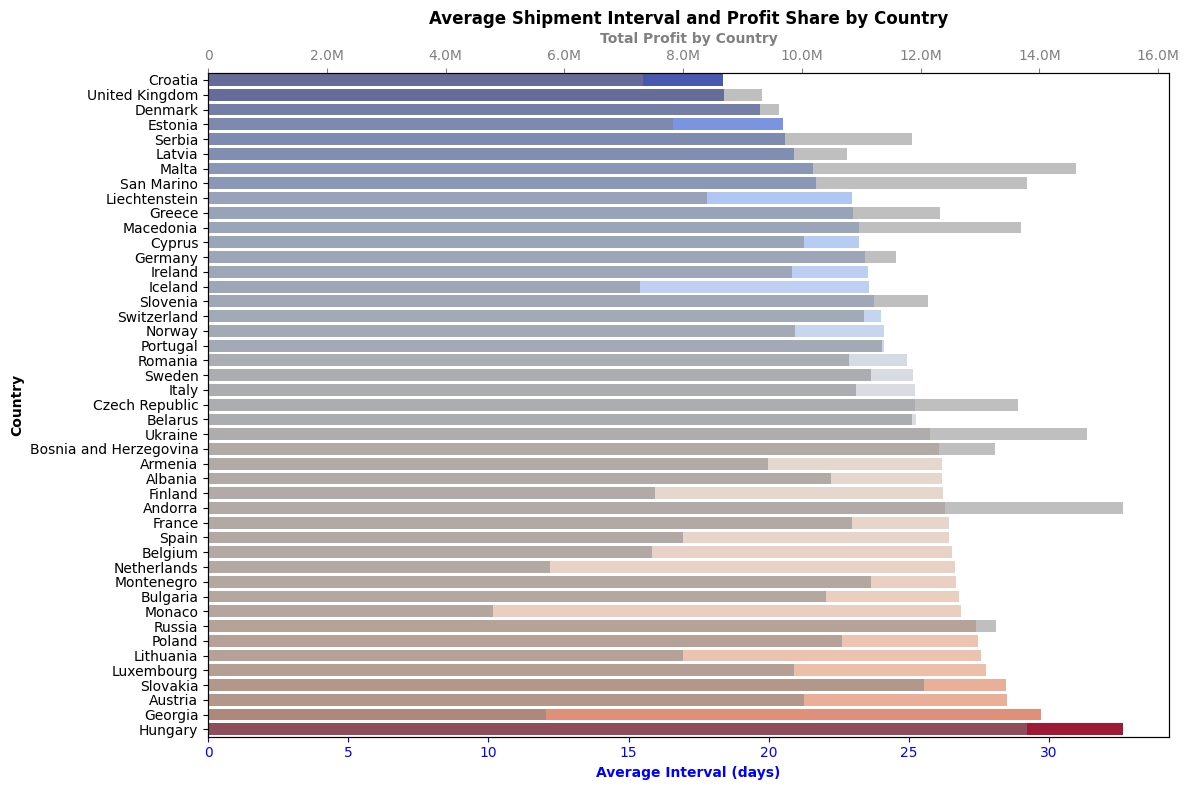

In [300]:
# термін відвантаження по країнах
interval_countries = df_union.groupby('country')['interval_days'].mean().sort_values()

# Прибуток по країнах
profit_by_country = df_union.groupby('country')['total_profit'].sum()
profit_by_country = profit_by_country[interval_countries.index]


fig, ax1 = plt.subplots(figsize=(12, 8))

# Графік інтервалу відвантаження
sns.barplot(
    x=interval_countries.values,
    y=interval_countries.index,
    hue=interval_countries.values,
    palette='coolwarm',
    ax=ax1,
    legend=False
)
ax1.set_xlabel("Average Interval (days)", fontweight='bold', color='blue')
ax1.set_ylabel("Country", fontweight='bold')
ax1.set_title("Average Shipment Interval and Profit Share by Country", fontweight='bold')
ax1.tick_params(axis='x', colors='blue')

# Додаємо другий графік на той самий `ax1` (другу вісь)
ax2 = ax1.twiny()
sns.barplot(
    x=profit_by_country.values,
    y=profit_by_country.index,
    color='gray',
    alpha=0.5,
    ax=ax2
)
# Форматування осі X для прибутку
ax2.xaxis.set_major_formatter(ticker.FuncFormatter(format_large_numbers))

ax2.set_xlabel("Total Profit by Country", fontweight='bold', color='gray')
ax2.tick_params(axis='x', colors='gray')

plt.tight_layout()
plt.show()


З цієї діаграми помітно що немає прямого звʼязку між прибутком і терміном відвантаження в розрізі країн, але це твердження може бути істинним для окремих країн. Для перевірки цього проведемо додатковий аналіз.

#### Діаграма терміну відвантаження по суб-регіонах

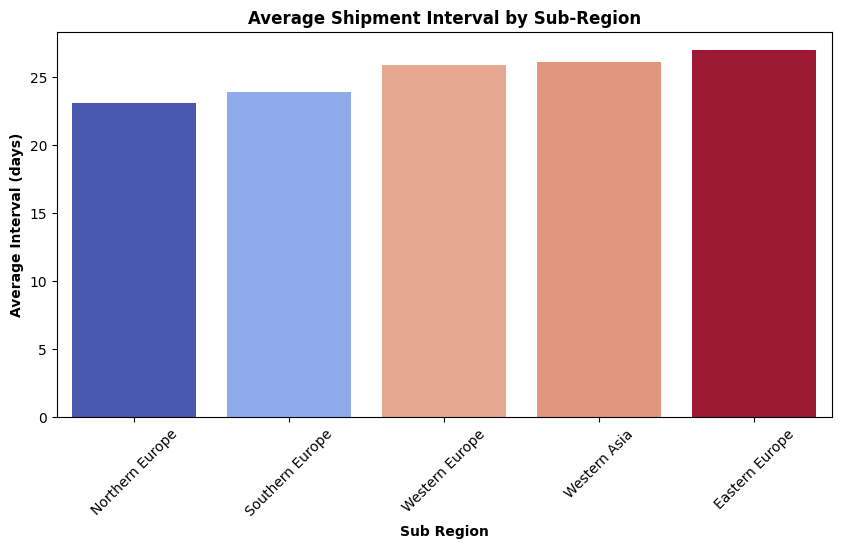

In [301]:
# групуємо по суб-регіонах
sub_region_avg = df_union.groupby('sub_region')['interval_days'].mean().sort_values()

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=sub_region_avg.index, y=sub_region_avg.values, hue=sub_region_avg, palette='coolwarm', legend=False)
ax.set_title("Average Shipment Interval by Sub-Region", fontweight='bold')
ax.set_xlabel("Sub Region", fontweight='bold')
ax.set_ylabel("Average Interval (days)", fontweight='bold')
plt.xticks(rotation=45)
plt.show()


#### Скатерплот залежності прибутку від терміну відвантаження

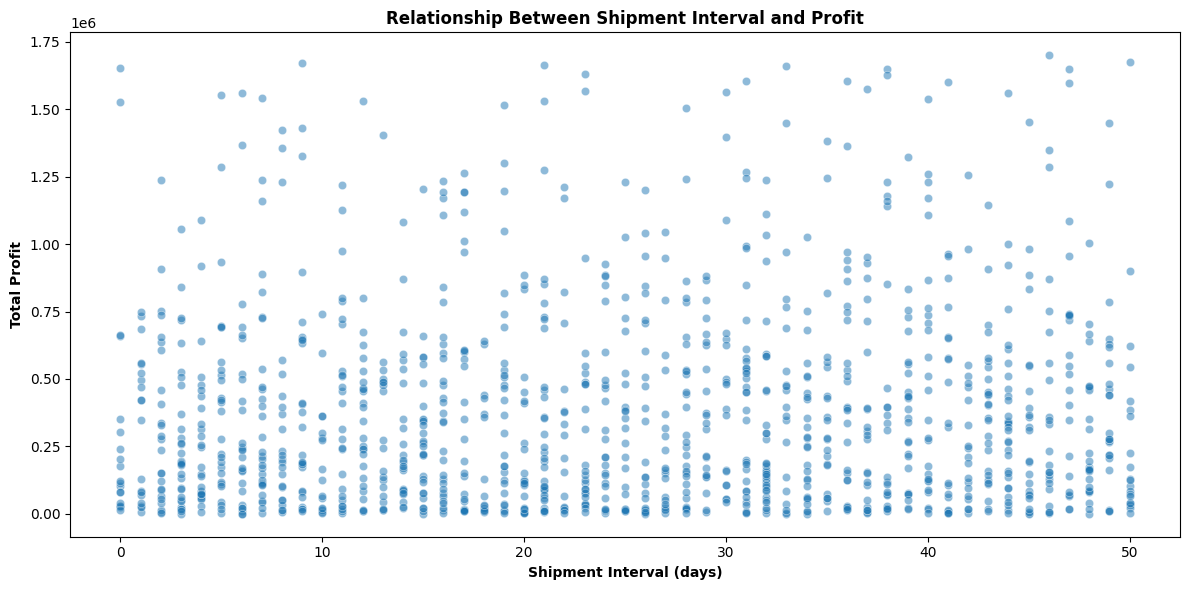

In [302]:
#Скатерплот Прибуток vs Інтервал відвантаження
plt.figure(figsize=(12, 6))
ax = sns.scatterplot(data=df_union, x='interval_days', y='total_profit', alpha=0.5)
ax.set_title("Relationship Between Shipment Interval and Profit", fontweight='bold')
ax.set_xlabel("Shipment Interval (days)", fontweight='bold')
ax.set_ylabel("Total Profit", fontweight='bold')
plt.tight_layout()
plt.show()


На цьому графіку не помітно негативної кореляції між прибутком і терміном відвантаження. Далі проведемо більш детальний аналіз.

#### Скатерплоти залежності прибутку від терміну відвантаження по суб-регіонах

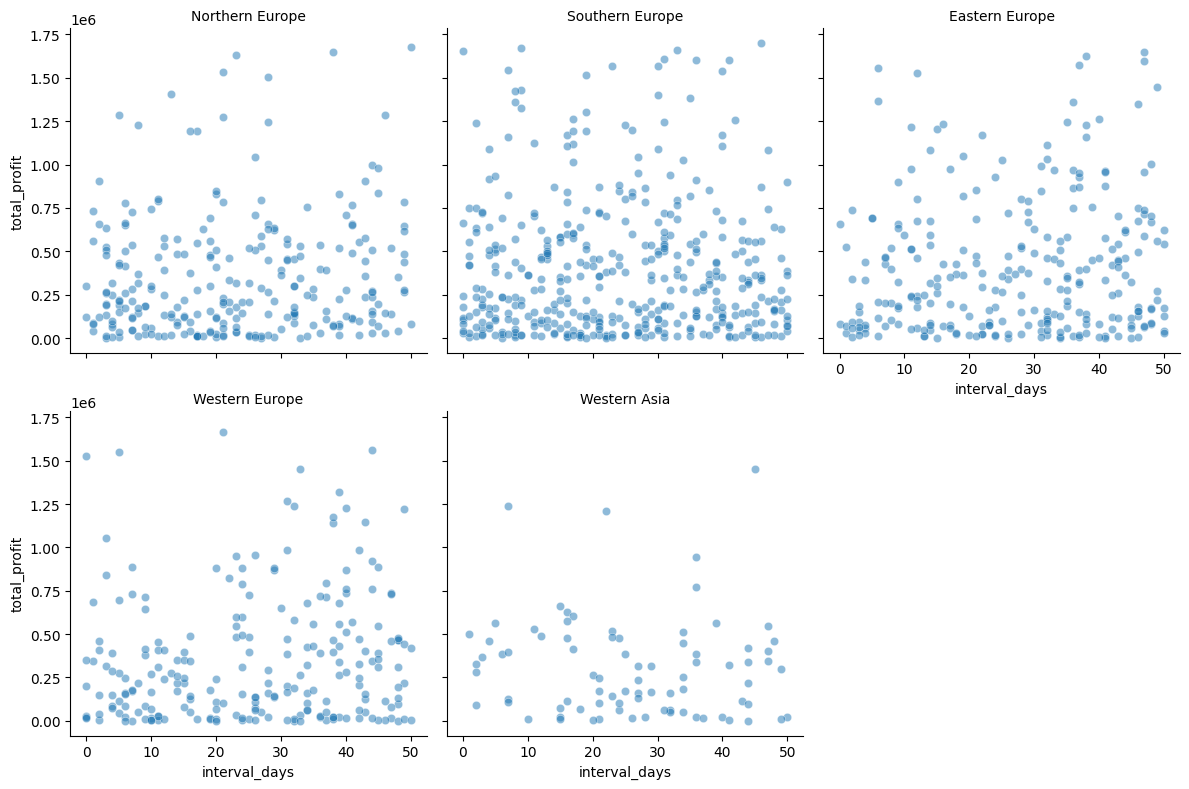

In [303]:
# прибуток vs інтервал відвантаження по суб-регіонах
g = sns.FacetGrid(df_union, col="sub_region", col_wrap=3, height=4, sharex=True, sharey=True)
g.map_dataframe(sns.scatterplot, x="interval_days", y="total_profit", alpha=0.5)
g.set_titles(col_template="{col_name}")
plt.tight_layout()
plt.show()

По суб регіонах не помітний звʼязок між прибутком і терміном відвантаження.

#### Скатерплоти залежності прибутку від терміну відвантаження по категоріях

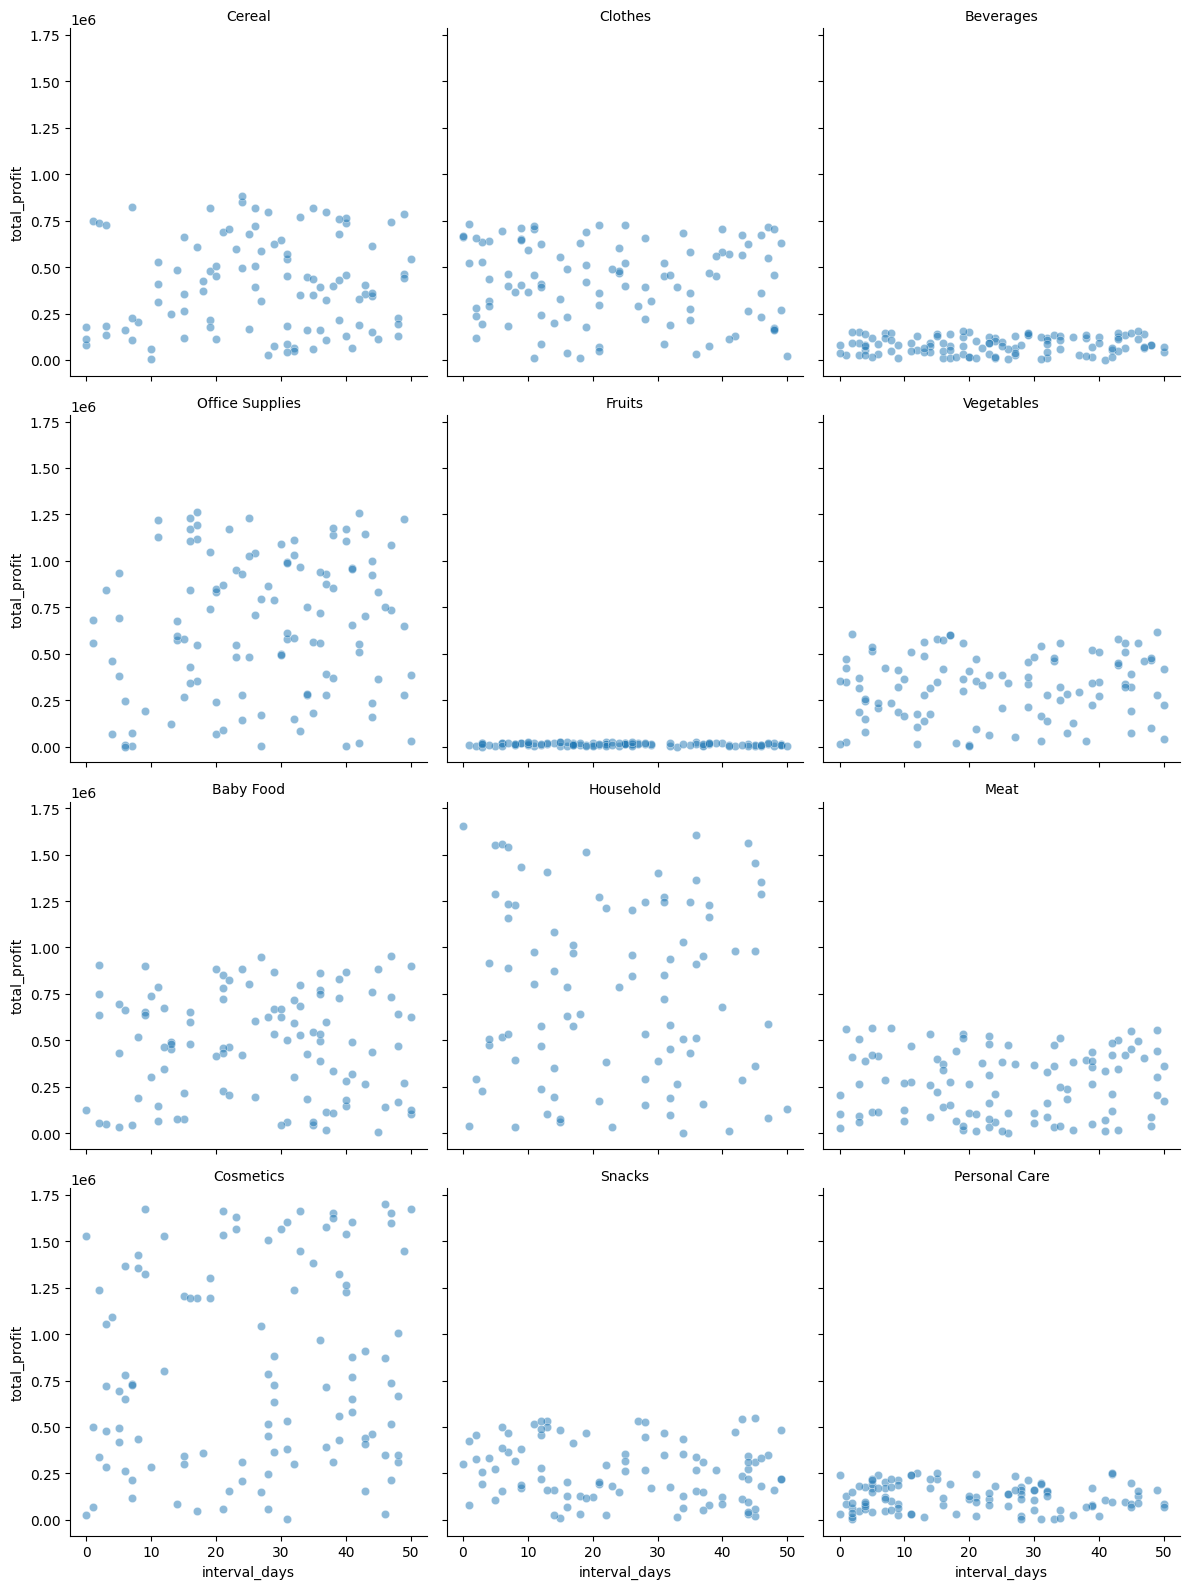

In [304]:
# Прибуток vs інтервал відвантаження  по категоріям
g = sns.FacetGrid(df_union, col="category", col_wrap=3, height=4, sharex=True, sharey=True)
g.map_dataframe(sns.scatterplot, x="interval_days", y="total_profit", alpha=0.5)
g.set_titles(col_template="{col_name}")
plt.tight_layout()
plt.show()

По категоріях також не помітно звʼязку між прибутком і терміном відвантаження.

#### Вибірковий аналіз залежності прибутку від терміну відвантаження на основі коефіцієнта кореляції

In [305]:
#перевіряємо кореляцію прибутку і терміну відвантаження
corr = df_union[['interval_days', 'total_profit']].corr()
print(corr)


               interval_days  total_profit
interval_days       1.000000      0.060695
total_profit        0.060695      1.000000


In [306]:
df_union.groupby('category')[['interval_days', 'total_profit']].corr()


interval_days  total_profit
category                                                  
Baby Food       interval_days       1.000000      0.010514
                total_profit        0.010514      1.000000
Beverages       interval_days       1.000000      0.070688
                total_profit        0.070688      1.000000
Cereal          interval_days       1.000000      0.057082
                total_profit        0.057082      1.000000
Clothes         interval_days       1.000000     -0.089687
                total_profit       -0.089687      1.000000
Cosmetics       interval_days       1.000000      0.120046
                total_profit        0.120046      1.000000
Fruits          interval_days       1.000000     -0.121346
                total_profit       -0.121346      1.000000
Household       interval_days       1.000000     -0.016864
                total_profit       -0.016864      1.000000
Meat            interval_days       1.000000      0.045524
                total_profit        0.045524      1.000000
Office Supplies interval_days       1.000000      0.118478
                total_profit        0.118478      1.000000
Personal Care   interval_days       1.000000     -0.054231
                total_profit       -0.054231      1.000000
Snacks          interval_days       1.000000     -0.159897
                total_profit       -0.159897      1.000000
Vegetables      interval_days       1.000000      0.100182
                total_profit        0.100182      1.000000

In [307]:
df_union.groupby('country')[['interval_days', 'total_profit']].corr()


interval_days  total_profit
country                                                  
Albania        interval_days       1.000000     -0.105641
               total_profit       -0.105641      1.000000
Andorra        interval_days       1.000000      0.108638
               total_profit        0.108638      1.000000
Armenia        interval_days       1.000000     -0.275461
...                                     ...           ...
Switzerland    total_profit        0.108042      1.000000
Ukraine        interval_days       1.000000     -0.003220
               total_profit       -0.003220      1.000000
United Kingdom interval_days       1.000000     -0.021270
               total_profit       -0.021270      1.000000

[90 rows x 2 columns]

In [308]:
corr_df = df_union.groupby('country')[['interval_days', 'total_profit']].corr().reset_index()

# Вибираємо лише кореляції між interval_days і total_profit
corr_filtered = corr_df[(corr_df['interval_days'] != 1)]  # Відкидаємо тривіальні кореляції

# Фільтруємо значущі кореляції (>|0.15| або < -0.15)
corr_filtered = corr_filtered[(corr_filtered['total_profit'].abs() >= 0.15)]

# Сортуємо за абсолютним значенням кореляції
corr_filtered = corr_filtered.sort_values(by='total_profit', key=abs, ascending=False)

# Виводимо ТОП-країни, де є значний вплив інтервалу доставки на прибуток
print(corr_filtered)


                   country       level_1  interval_days  total_profit
1                  Albania  total_profit      -0.105641           1.0
47           Liechtenstein  total_profit       0.190386           1.0
51              Luxembourg  total_profit       0.225658           1.0
53               Macedonia  total_profit      -0.195323           1.0
55                   Malta  total_profit       0.292863           1.0
57                  Monaco  total_profit      -0.574687           1.0
59              Montenegro  total_profit      -0.287031           1.0
61             Netherlands  total_profit       0.299949           1.0
63                  Norway  total_profit       0.359394           1.0
65                  Poland  total_profit       0.110651           1.0
67                Portugal  total_profit       0.167629           1.0
69                 Romania  total_profit      -0.045625           1.0
71                  Russia  total_profit      -0.034738           1.0
73              San 

#### Скатерплот залежності прибутку від терміну відвантаження для країн із негативною кореляцією

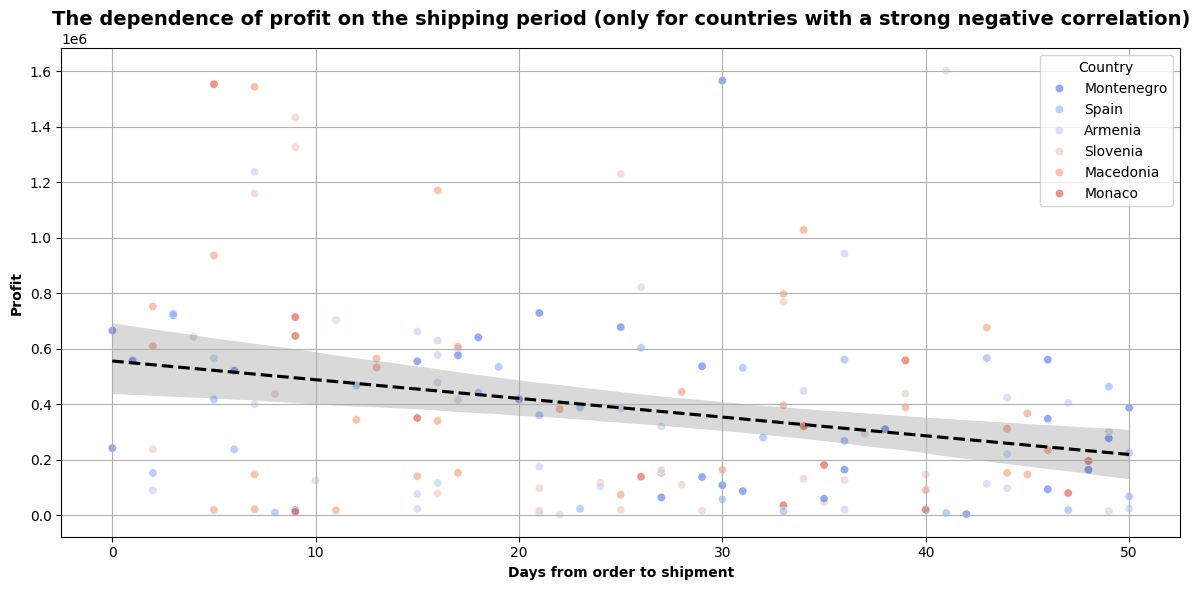

In [309]:


# Відбираємо країни з кореляцією ≤ -0.15 (сильна негативна кореляція)
strong_negative_corr = corr_df[corr_df['interval_days'] <= -0.15]

# Вибираємо тільки ті країни, які мають сильну негативну кореляцію
top_countries = strong_negative_corr['country'].tolist()

# Фільтруємо основний датафрейм за цими країнами
df_filtered = df_union[df_union['country'].isin(top_countries)]

# Побудова scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_filtered, x="interval_days", y="total_profit", hue="country", palette="coolwarm", alpha=0.7)

# Додаємо трендову лінію
sns.regplot(data=df_filtered, x="interval_days", y="total_profit", scatter=False, color="black", line_kws={"linestyle": "dashed"})

plt.title("The dependence of profit on the shipping period (only for countries with a strong negative correlation)", fontsize=14, fontweight='bold')
plt.xlabel("Days from order to shipment", fontweight='bold')
plt.ylabel("Profit", fontweight='bold')
plt.legend(title="Country")
plt.grid(True)

plt.tight_layout()
plt.show()


In [310]:
print(top_countries)


['Armenia', 'Macedonia', 'Monaco', 'Montenegro', 'Slovenia', 'Spain']


Спад прибутку із збільшенням періоду відвантаження помітний лише в декількох країнах: Armenia, Macedonia, Monaco, Montenegro, Slovenia, Spain. Лише одна з цих країн входить в Топ-10 по прибутку, тому це не помітно в загальних трендах, але на це варто звернути увагу.

#### Скатерплоти по країнам і категоріям із негативною кореляцією

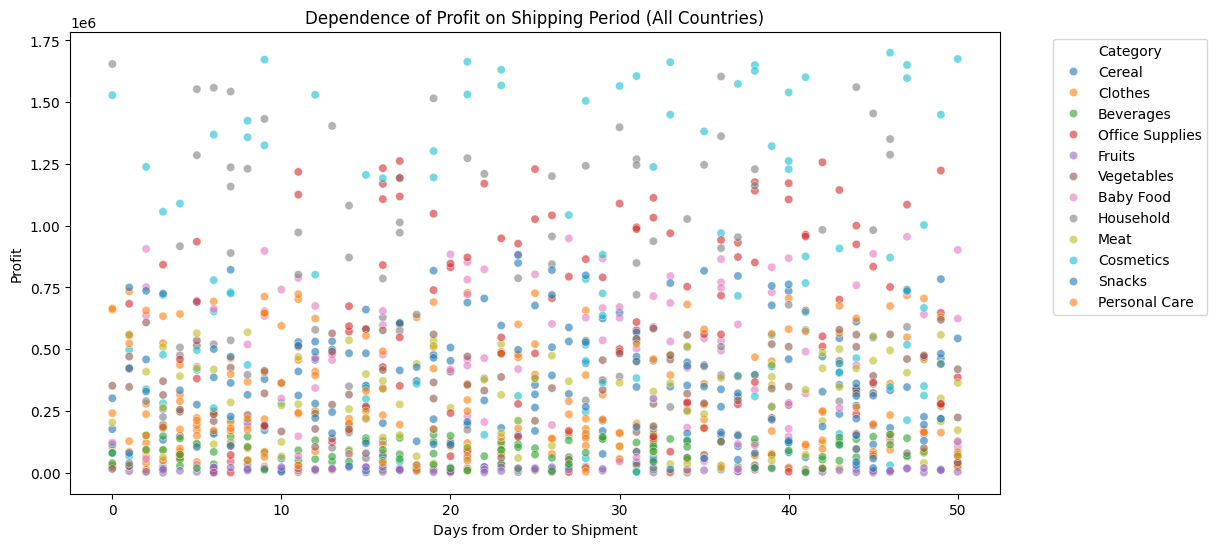

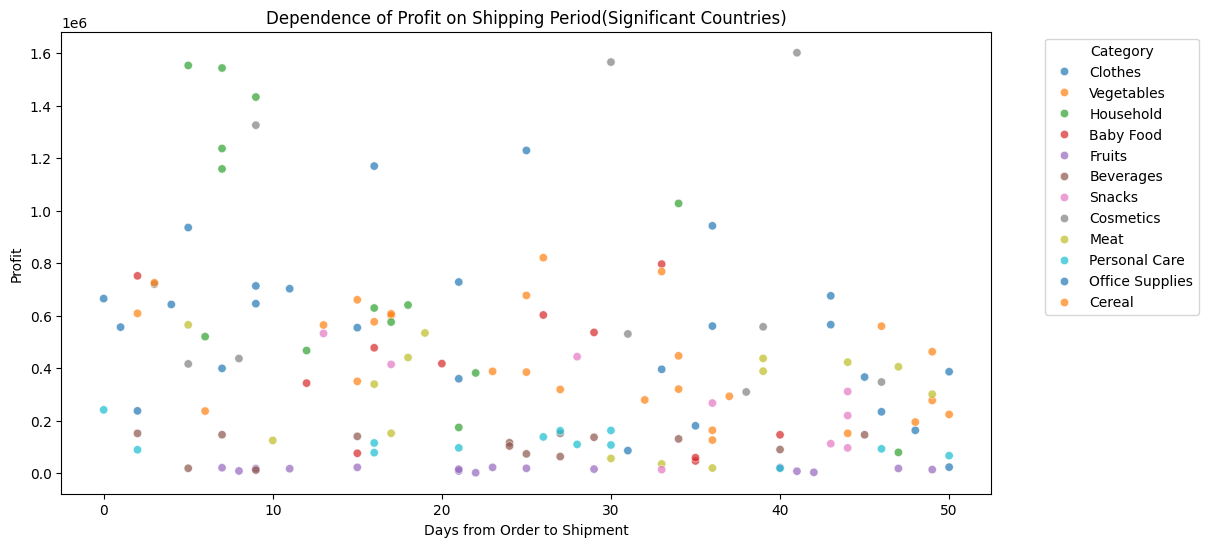

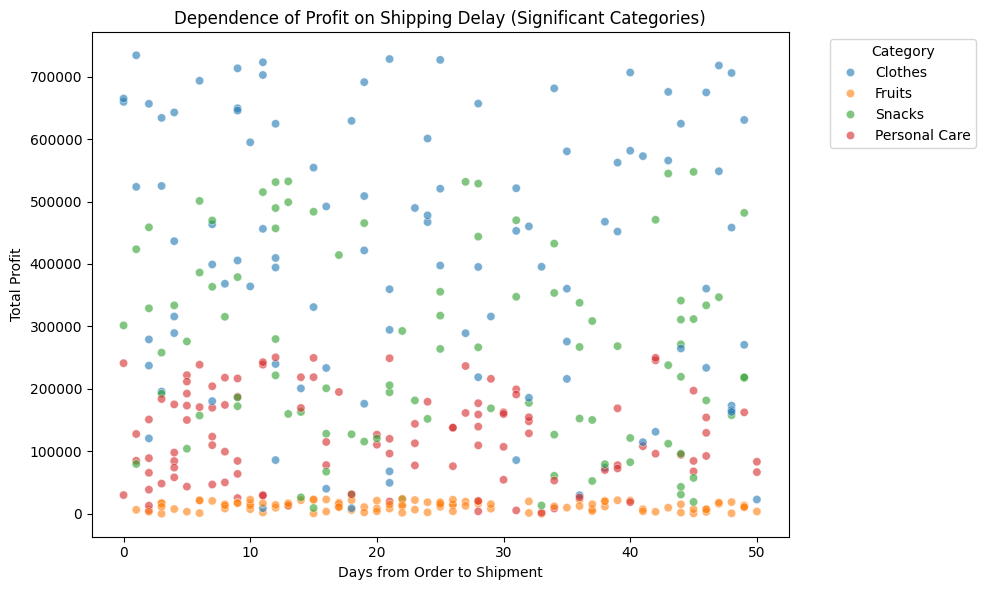

In [311]:


# Вибираємо необхідні колонки
df_selected = df_union[['interval_days', 'total_profit', 'category', 'country']]

# ---- ВІЗУАЛІЗАЦІЯ ДЛЯ ВСІХ КРАЇН ----
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_selected, x="interval_days", y="total_profit", hue="category", palette="tab10", alpha=0.6)
plt.title("Dependence of Profit on Shipping Period (All Countries)")
plt.xlabel("Days from Order to Shipment")
plt.ylabel("Profit")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()



# ---- ВІЗУАЛІЗАЦІЯ ДЛЯ ВИБРАНИХ КРАЇН ----
# Тепер фільтруємо за країнами із сильною негативною кореляцією
corr_countries = (
    df_union.groupby('country')[['interval_days', 'total_profit']]
    .corr().unstack()['total_profit']['interval_days']
)

# Вибираємо країни з кореляцією ≤ -0.1
strong_negative_countries = corr_countries[corr_countries <= -0.1].index.tolist()

# Фільтруємо датафрейм за цими країнами
df_country_filtered = df_filtered[df_filtered['country'].isin(strong_negative_countries)]


plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_country_filtered, x="interval_days", y="total_profit", hue="category", palette="tab10", alpha=0.7)
plt.title("Dependence of Profit on Shipping Period(Significant Countries)")
plt.xlabel("Days from Order to Shipment")
plt.ylabel("Profit")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')


# Обчислюємо кореляцію між interval_days і total_profit для кожної категорії
corr_values = (
    df_union.groupby('category')[['interval_days', 'total_profit']]
    .corr().unstack()['total_profit']['interval_days']
)

# Вибираємо категорії, де кореляція є помітною (<= -0.05 )
strong_corr_categories = corr_values[corr_values <= -0.05].index.tolist()

# Фільтруємо основний датафрейм по цих категоріях
df_filtered = df_union[df_union['category'].isin(strong_corr_categories)]

# Будуємо графік  по відібраних категоріях
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='interval_days', y='total_profit', hue='category', alpha=0.6)
plt.title("Dependence of Profit on Shipping Delay (Significant Categories)")
plt.xlabel("Days from Order to Shipment")
plt.ylabel("Total Profit")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Незначна залежність прибутку від терміну відвантаження помітна  лише для вибраних країн. Тож можемо підсумувати:<br>Збільшення терміну відвантаження не приводить до зменшення прибутку за виключенням декількох країн: Armenia, Macedonia, Monaco, Montenegro, Slovenia, Spain. Найімовірніше це витікає із того що більшість продажів B2B опт.

In [312]:
print(strong_negative_countries)


['Albania', 'Armenia', 'Ireland', 'Macedonia', 'Monaco', 'Montenegro', 'Slovenia', 'Spain']


In [313]:
print(df_country_filtered['country'].nunique())
print(df_country_filtered['country'].unique())




6
['Montenegro' 'Spain' 'Armenia' 'Slovenia' 'Macedonia' 'Monaco']


### Аналіз динаміки прибутку у часі

#### Діаграма динаміки прибутку у часі з лінією середньго прибутку і ковзним середнім за 24 місяці

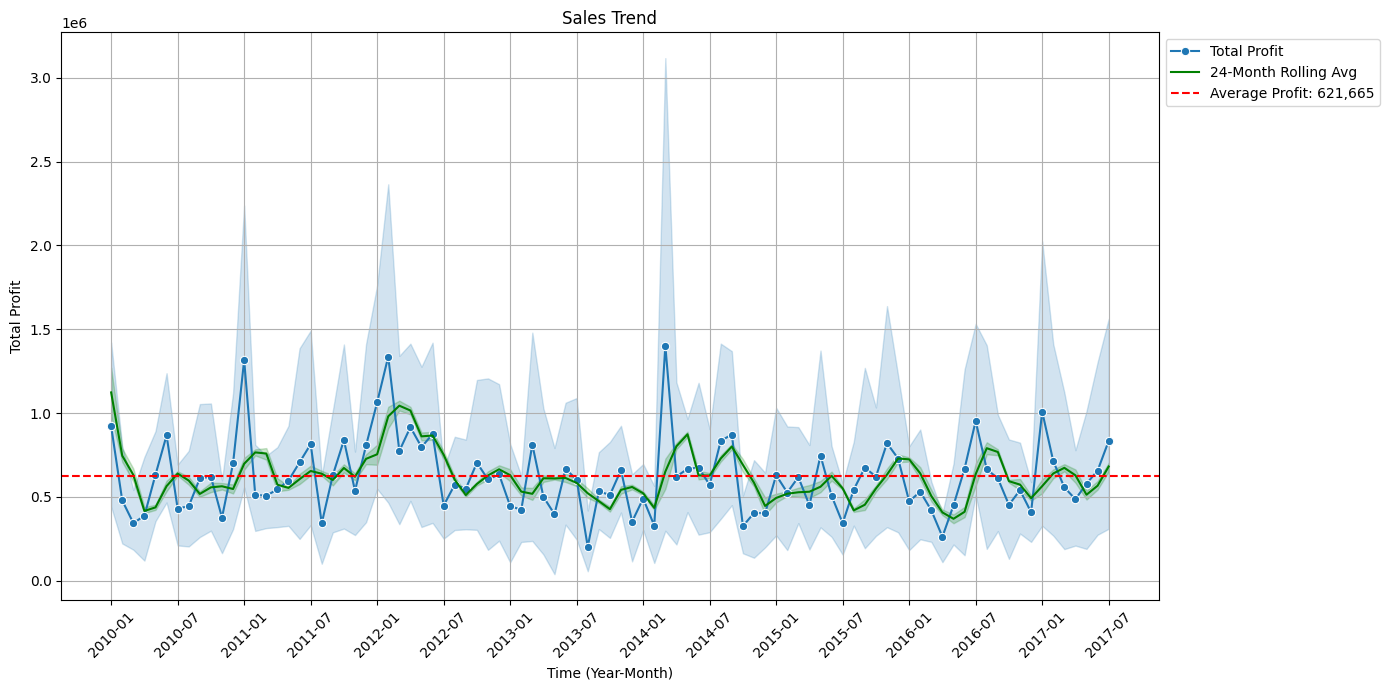

In [314]:


# Додаємо місяць та рік для аналізу динаміки у часі
df_union['year_month'] = df_union['order_date'].dt.to_period('M')

# Групуємо за місяцями та категоріями товарів
sales_trend = df_union.groupby(['year_month', 'category'])['total_profit'].sum().reset_index()

# Обчислюємо ковзне середнє та середній прибуток
sales_trend['rolling_avg'] = sales_trend['total_profit'].rolling(window=24, min_periods=1).mean()  # 24-місячне середнє
avg_profit = sales_trend['total_profit'].mean()

# Перетворюємо period у string для відображення на графіку
sales_trend['year_month'] = sales_trend['year_month'].astype(str)

# Візуалізація тренду
plt.figure(figsize=(14, 7))
ax = sns.lineplot(data=sales_trend, x='year_month', y='total_profit', marker='o', label="Total Profit")

# Ковзне середнє
sns.lineplot(data=sales_trend, x='year_month', y='rolling_avg', color='green', linestyle='-', label='24-Month Rolling Avg')

# Встановлюємо мітки через кожні 6 місяців
xticks = sales_trend['year_month'].unique()[::6]  # кожен 6-й місяць
ax.set_xticks(range(0, len(sales_trend['year_month'].unique()), 6))  # числові індекси
ax.set_xticklabels(xticks, rotation=45)  # текстові мітки

# Додаємо горизонтальну лінію середнього
ax.axhline(y=avg_profit, color='red', linestyle='--', label=f'Average Profit: {avg_profit:,.0f}')

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.xlabel("Time (Year-Month)")
plt.ylabel("Total Profit")
plt.title("Sales Trend")
plt.grid(True)

plt.tight_layout()
plt.show()


На цьому графіку помічаємо коливання прибутку з досить великою амплітудою від 200К до 1.5 млн без суттєвого росту чи падіння прибутку. Найбільші піки  2014-03, 2011-01, 2012-02, 2017-01. Це свідчить про певну сезонність, але зважаючи на досить довгий період відвантаження, для висновків необхідно зʼясувати як здійснюється оплата (передплата/післяплата). В загальному і на ковзній середній помітно зменшення амплітуди, що може свідчити про оптимізацію продажів.

#### Діаграми динаміки прибутку у часі по категоріях

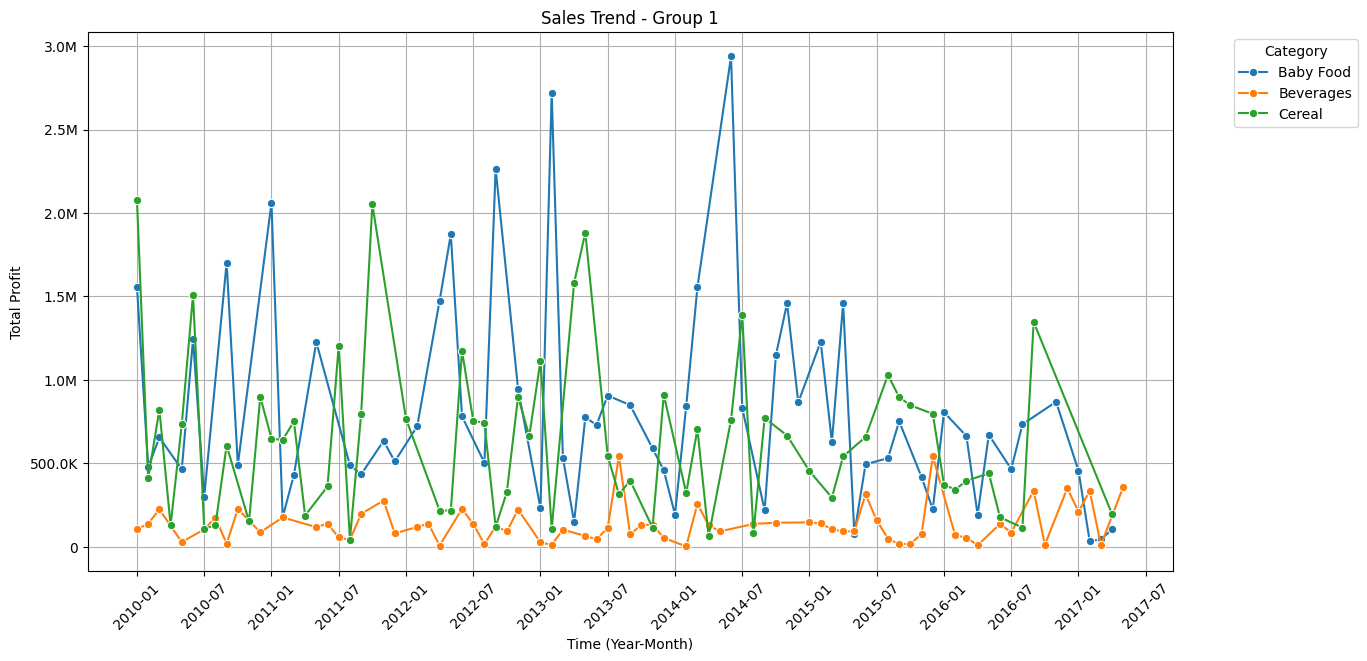

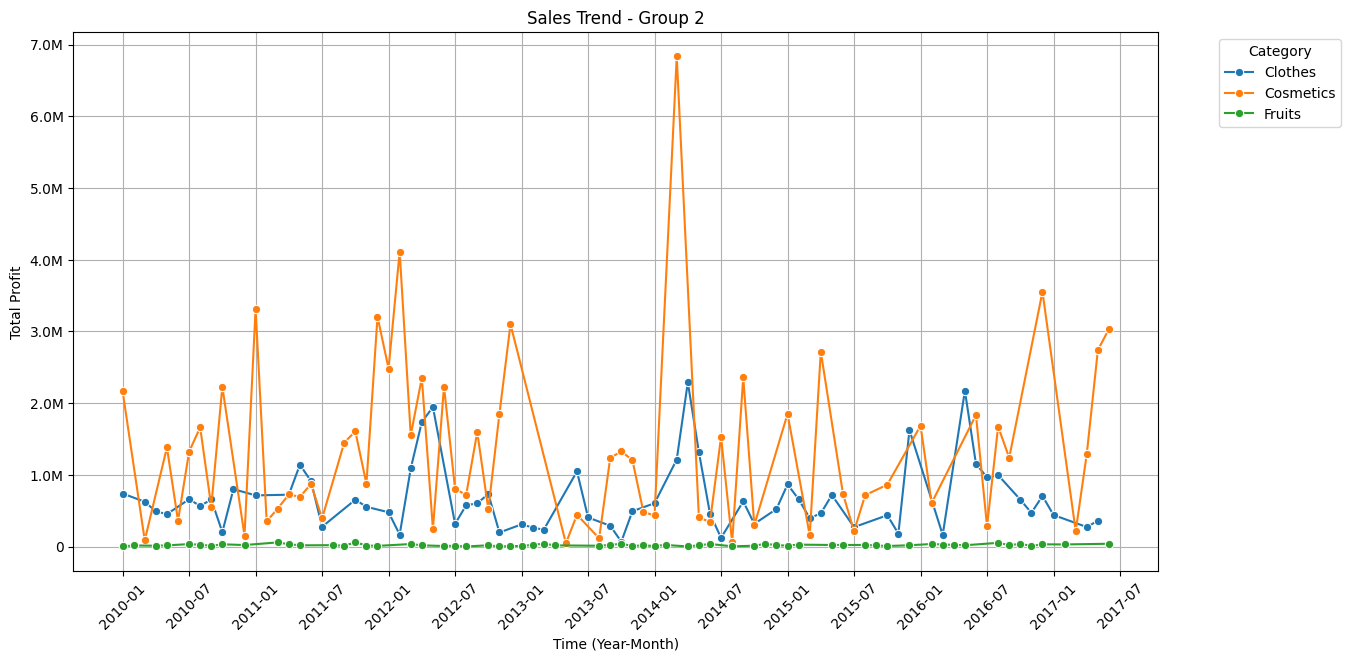

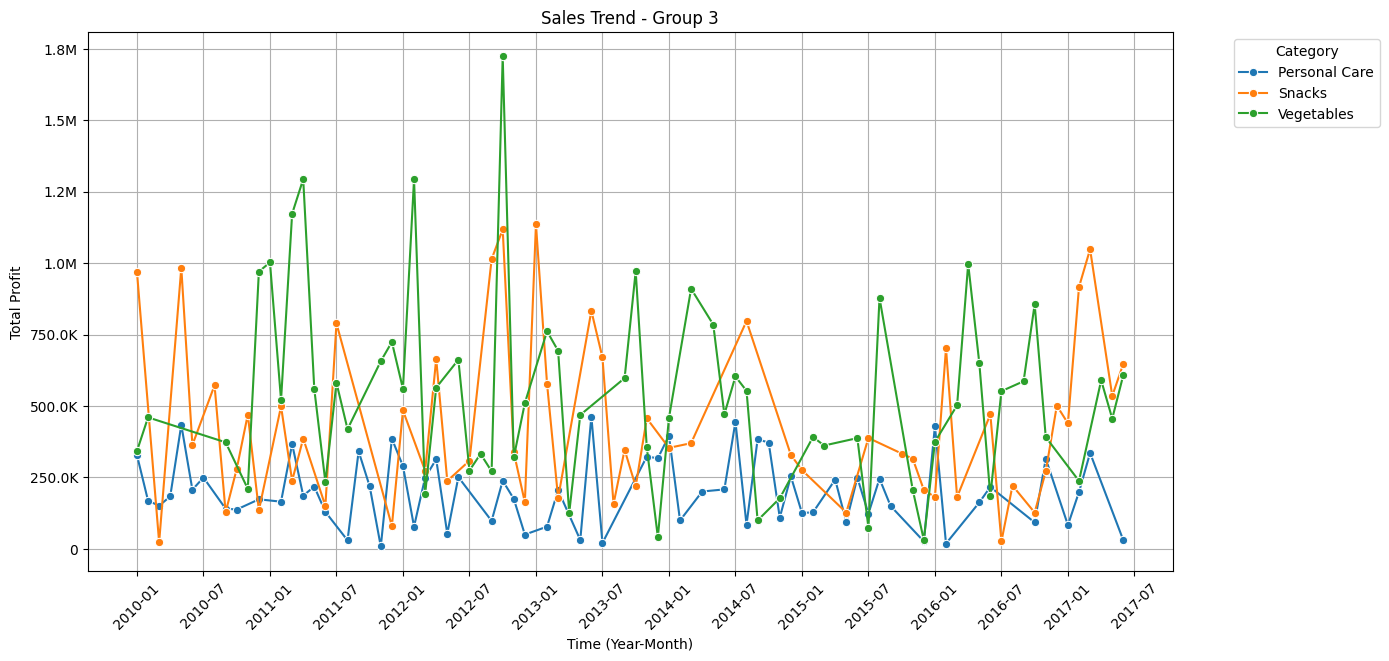

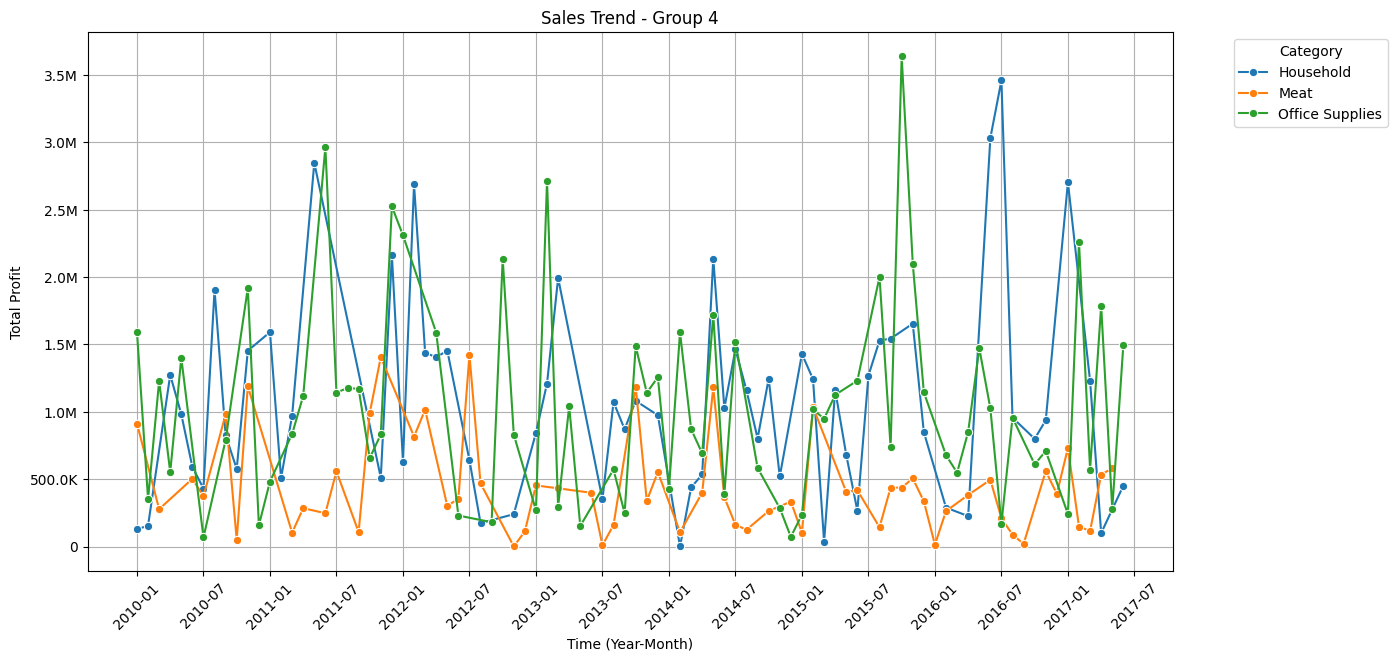

In [316]:


# Отримуємо унікальні категорії з усіх даних
all_categories = sales_trend['category'].unique()


# Розбиваємо всі категорії на 4 групи по рівномірній кількості
num_groups = 4
categories_split = np.array_split(all_categories, num_groups)

# Перетворюємо period в строку (для коректного відображення графіків)
sales_trend['year_month'] = sales_trend['year_month'].astype(str)

# Функція для побудови графіка
def plot_sales_trend(categories, title):
    plt.figure(figsize=(14, 7))
    ax = sns.lineplot(data=sales_trend[sales_trend['category'].isin(categories)],
                      x='year_month', y='total_profit', hue='category', marker='o')
    # Форматування осі Y
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_large_numbers))


    # Встановлюємо мітки через кожні 6 місяців
    xticks = sales_trend['year_month'].unique()[::6]  # кожен 6-й місяць
    ax.set_xticks(range(0, len(sales_trend['year_month'].unique()), 6))  # числові індекси
    ax.set_xticklabels(xticks, rotation=45)  # текстові мітки

    plt.xlabel("Time (Year-Month)")
    plt.ylabel("Total Profit")
    plt.title(title)
    plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')  # Виносимо легенду за межі графіка
    plt.grid(True)
    plt.show()

# Будуємо 4 графіки з рівномірно розподіленими категоріями
for i, group in enumerate(categories_split):
    plot_sales_trend(group, f"Sales Trend - Group {i+1}")


З графіків динаміки продажів в розрізі категорій помітно сильні коливання прибутку для всіх категорій, окрім низькоприбуткових. Ці коливання найімовірніше повʼязані з специфікою продажів компанії B2B та опт, наприклад замовлення можуть розміщуватись не кожного місяця, або замовлення по передплаті, а термін відвантаження 30+ днів. В усіх категоріях помітна сезонність, є певні збіги по піках що вказує на загальну зміну попиту не залежну від категорії.

In [317]:
print(top_5_categories['by_total_profit_percent'])
print(top_5_categories['by_total_profit_margin'])
print(top_5_categories['by_units_sold'])

[['Cosmetics', 18.579106803156613], ['Office Supplies', 15.497271704074977], ['Household', 14.599775330702764], ['Baby Food', 10.609053064321346], ['Clothes', 8.981198071219241]]
[['Clothes', 67.20351390922401], ['Cereal', 43.067574137092855], ['Vegetables', 40.97754121770738], ['Cosmetics', 39.76898444647758], ['Baby Food', 37.550924475086184]]
[['Office Supplies', 581481.0], ['Clothes', 579313.0], ['Beverages', 577991.0], ['Vegetables', 532510.0], ['Fruits', 531135.0]]


#### Діаграма динаміки прибутку у часі для Топ країн

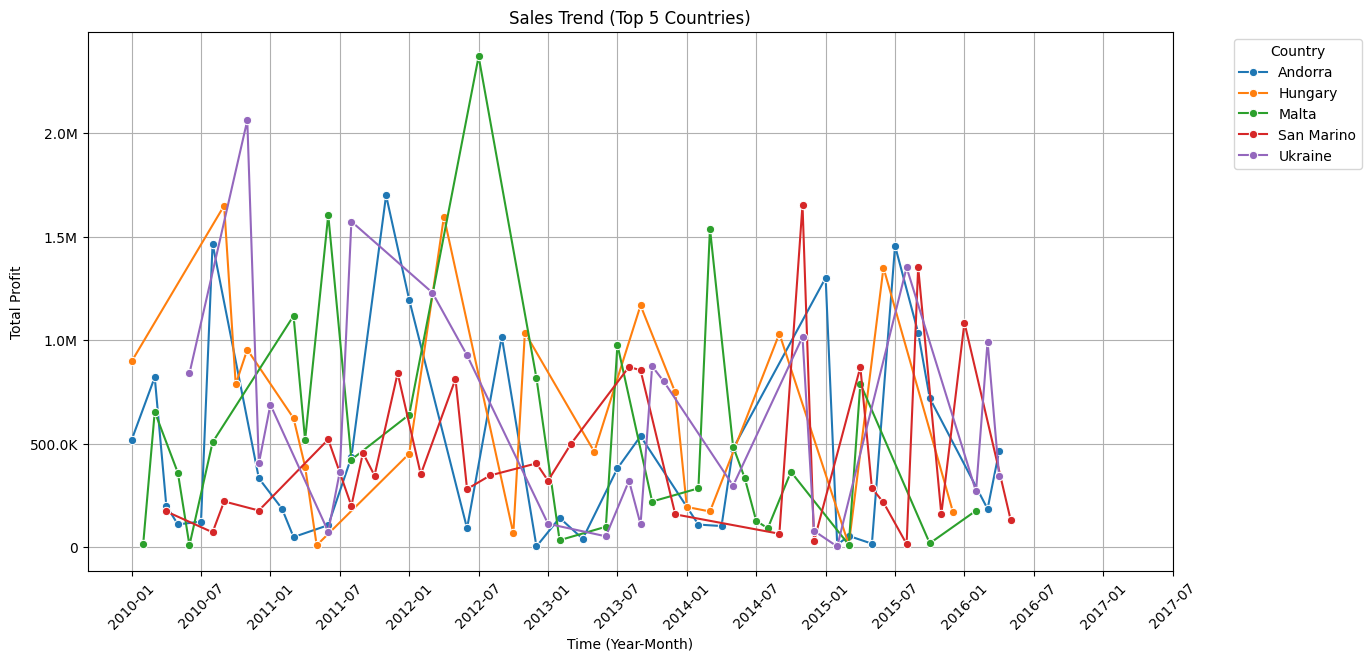

In [319]:
country_trend = df_union.groupby(['year_month', 'country'])['total_profit'].sum().reset_index()

# Перетворюємо total_profit в числовий формат та заповнюємо NaN
country_trend['total_profit'] = pd.to_numeric(country_trend['total_profit'], errors='coerce').fillna(0)

#Відсортовуємо Топ-5 за прибутком
top_countries = country_trend.groupby('country')['total_profit'].sum().nlargest(5).index
top_country_trend = country_trend[country_trend['country'].isin(top_countries)].copy()

# Переконуємось, що year_month — це строка (для коректного відображення на графіку)
top_country_trend['year_month'] = top_country_trend['year_month'].astype(str).copy()

plt.figure(figsize=(14, 7))
ax = sns.lineplot(data=top_country_trend, x='year_month', y='total_profit', hue='country', marker='o')

# Форматування осі Y
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_large_numbers))


# Встановлюємо мітки через кожні 6 місяців
xticks = sales_trend['year_month'].unique()[::6]  # кожен 6-й місяць
ax.set_xticks(range(0, len(sales_trend['year_month'].unique()), 6))  # числові індекси
ax.set_xticklabels(xticks, rotation=45)  # текстові мітки

plt.xticks(rotation=45)
plt.xlabel("Time (Year-Month)")
plt.ylabel("Total Profit")
plt.title("Sales Trend (Top 5 Countries)")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


Динаміка продажів по місяцях в розрізі країн також має суттєві перепади. Це підтверджує попередні висновки про сезонність товарів.

#### Теплова карта прибутку по країнах у часі

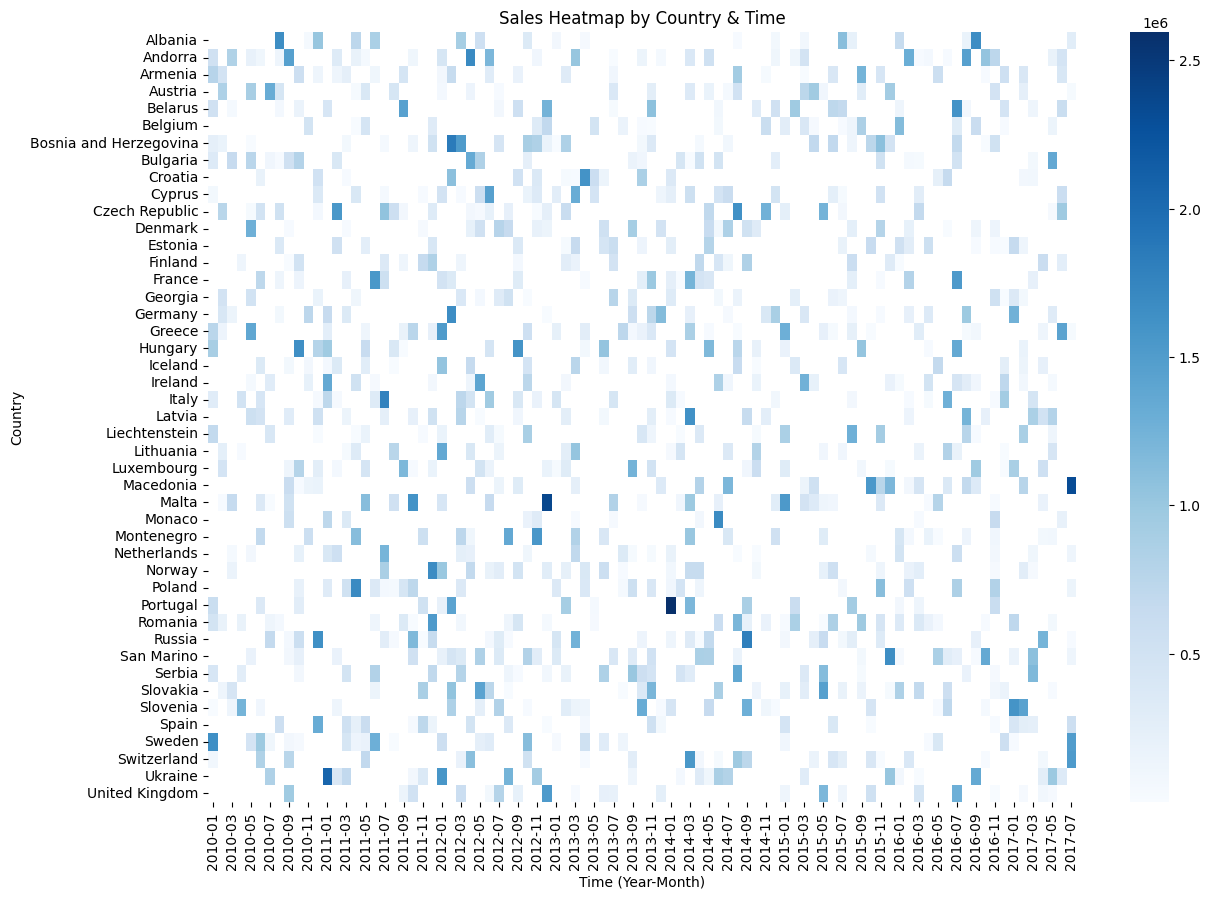

In [320]:
heatmap_data = country_trend.pivot_table(index='country', columns='year_month', values='total_profit', aggfunc='sum')

plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap='Blues', annot=False)
plt.xlabel("Time (Year-Month)")
plt.ylabel("Country")
plt.title("Sales Heatmap by Country & Time")
plt.show()


З теплової карти прибутку по країнах і місяцях помітно що немає таких періодів де би був високий прибуток для всіх країн. Є невеликі острівки які частково підтверджують збіг періодів сезонності в декількох країнах. Це також підтверджує гіпотезу що динаміка більше залежить від специфіки продажів чим від інших факторів.

#### Діаграма динаміки прибутку у часі по суб-регіонах

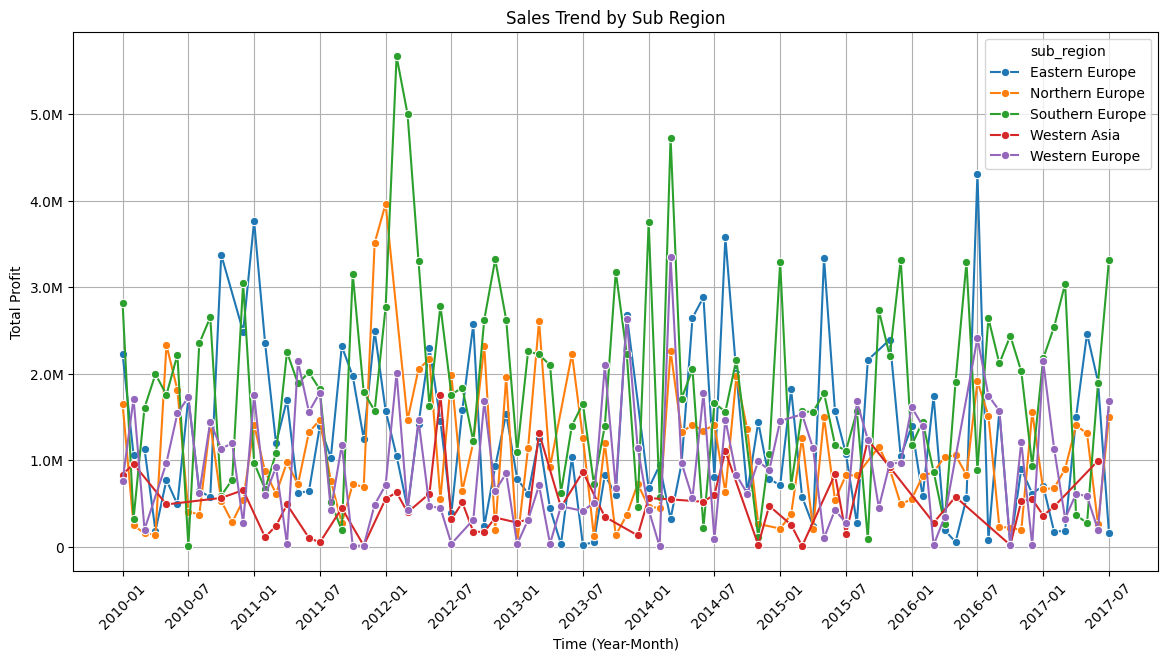

In [322]:
# Групуємо за суб регіонами
sub_region_trend = df_union.groupby(['year_month', 'sub_region'])['total_profit'].sum().reset_index()

# Перетворюємо total_profit в числовий формат та заповнюємо NaN
sub_region_trend['total_profit'] = pd.to_numeric(sub_region_trend['total_profit'], errors='coerce').fillna(0)

# Переконуємось, що year_month — це строка (для коректного відображення на графіку)
sub_region_trend['year_month'] = sub_region_trend['year_month'].astype(str)
plt.figure(figsize=(14, 7))
ax = sns.lineplot(data=sub_region_trend, x='year_month', y='total_profit', hue='sub_region', marker='o')

# Встановлюємо мітки через кожні 6 місяців
xticks = sales_trend['year_month'].unique()[::6]  # кожен 6-й місяць
ax.set_xticks(range(0, len(sales_trend['year_month'].unique()), 6))  # числові індекси
ax.set_xticklabels(xticks, rotation=45)  # текстові мітки

# Форматування осі Y
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_large_numbers))

plt.xticks(rotation=45)
plt.xlabel("Time (Year-Month)")
plt.ylabel("Total Profit")
plt.title("Sales Trend by Sub Region")
# plt.legend(title="Sub Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


За суб регіонами маємо таку саму картину.

### Аналіз сезонності


#### Діаграми прибутку по роках, місяцях та днях тижня

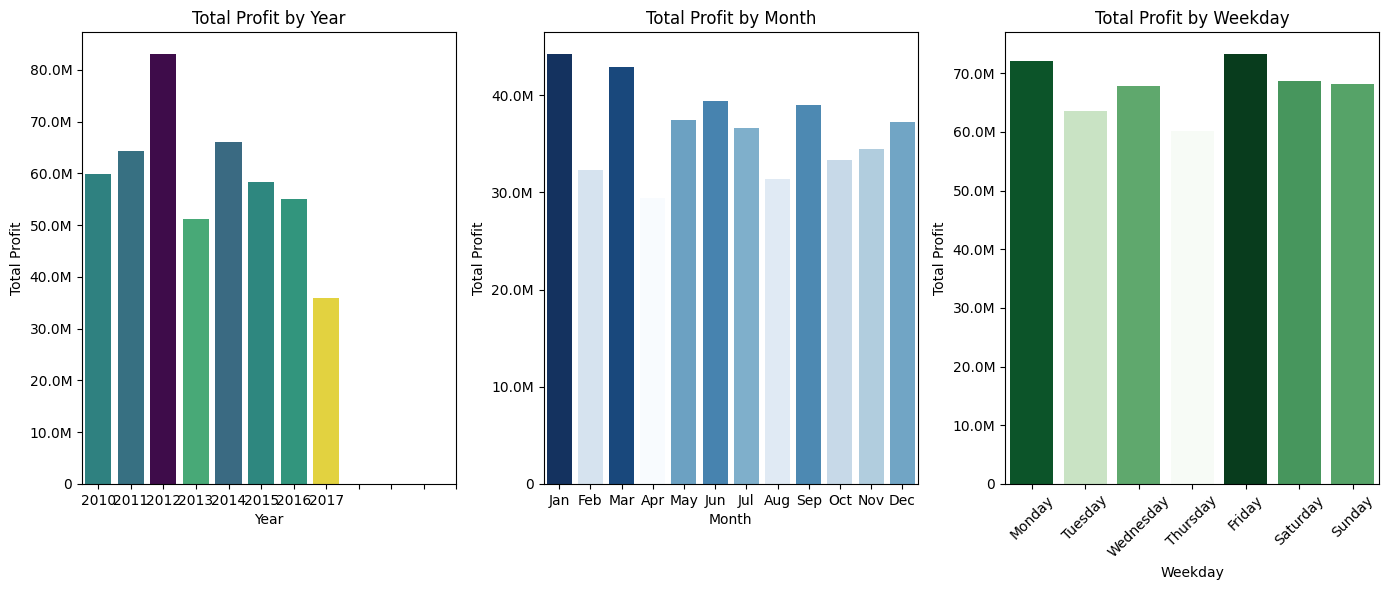

In [326]:

# Додаємо рік, місяць та день тижня
df_union['year'] = df_union['order_date'].dt.year
df_union['month'] = df_union['order_date'].dt.month
df_union['weekday'] = df_union['order_date'].dt.day_name()

# групуємо дані за роками
yearly_profit = df_union.groupby('year')['total_profit'].sum().reset_index()

# Групуємо дані за місяцями і роками
monthly_profit = df_union.groupby(['month', 'year'])['total_profit'].sum().reset_index()

# Фільтруємо всі записи, де рік не 2017 щоб коректно розподілити так як дані за 2017р не повні
monthly_profit = monthly_profit[monthly_profit['year'] != 2017]
monthly_profit = monthly_profit.groupby('month')['total_profit'].sum().reset_index()

# Групуємо дані за днями тижня (з правильним порядком днів)
weekday_profit = df_union.groupby('weekday')['total_profit'].sum().reset_index()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_profit['weekday'] = pd.Categorical(weekday_profit['weekday'], categories=weekday_order, ordered=True)
weekday_profit = weekday_profit.sort_values('weekday')

# Візуалізація
fig, axes = plt.subplots(1, 3, figsize=(14, 6))

# Прибуток по роках
ax = sns.barplot(ax=axes[0], data=yearly_profit, x='year', y='total_profit', hue='total_profit',
                 palette='viridis_r', legend=False)

# Форматування осі Y
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_large_numbers))
axes[0].set_xticks(range(0, 12))
axes[0].set_title("Total Profit by Year")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Total Profit")


# Прибуток по місяцях
ax = sns.barplot(ax=axes[1], data=monthly_profit, x='month', y='total_profit', hue='total_profit',
                 palette='Blues', legend=False)
# Форматування осі Y
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_large_numbers))

axes[1].set_xticks(range(0, 12))
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[1].set_title("Total Profit by Month")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Total Profit")

# Прибуток по днях тижня
ax = sns.barplot(ax=axes[2], data=weekday_profit, x='weekday', y='total_profit', hue='total_profit',
                 palette='Greens', legend=False)
# Форматування осі Y
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_large_numbers))

axes[2].set_title("Total Profit by Weekday")
axes[2].set_xlabel("Weekday")
axes[2].set_ylabel("Total Profit")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




З гафіку прибутку по роках помітна тенденція зниження прибутку, але враховуючи що дані за 2017р. наявні по липень, то можна очікувати приросту. З графіка прибутку по місяцях помітно сезонність. Помітно що найбільший прибуток отримано в січні, березні та червні, найменший в квітні, серпні та жовтні. Це варто врахувати при плануванні рекламних кампаній, а саме збільшувати інтенсивність завчасно. По дням прибуток розподілений більш рівномірно, пікові дні: понеділок та пʼятниця.

# Звіт
###  Вступ
#### Ціль: очищення даних та проведення їх аналізу; знаходження цінних інсайтів діяльності компанії.
#### Опис датасету:
файли:
* events.csv: 1330 записів в 10 стовпцях дані про продажі. Кожний рядок містить: id замовлення, дату замовлення, дату відвантаження, приорітет замовлення, id категорії, код країни, кількість юнітів, ціну юніта, витрати на юніт.
* countries.csv: 249 записів в 5 стовцях. Містить: назви країн, коди країн, регіони та суб-регіони.
* products.csv: 12 записів в 2 стовпцях. Містить: id та назву категорії.

###  Огляд та очистка даних
####  Відсутні значення
Невідомо 82 країни, 6% від загального.  
Відсутнє значення units sold в 2 рядках.<br>Щоб не спотворювати дані в розрізі країн, видаляємо рядки з невідомими країнами і значенням units sold.
####  Дублікати
Дублікати не виявлені
#### Тип даних та аномалії
* Змінюємо тип order_date та ship_date на дату.
* Видаляємо зайві пробіли.
* Змінюємо стиль заголовків.
* Приводимо до нижнього регістра всі значення стовпчика sales_channel так як там є аномалії.
#### Додаткові характеристики
Додаємо стовпчики з загальними характеристиками:
* Загальний дохід
* Загальний прибуток
* Загальні витрати
* Середня маржинальність
* ASP середня ціна продажу
### Загальний огляд

Період діяльності компанії: 2010 — 2017 роки.
<br>Географія: Європа, Західна Азія. 45 країн.
<br>Категорії товарів:
1.   Cereal
2. Household
3. Clothes
4. Beverages
5. Office Supplies
6. Fruits
7. Vegetables
8. Baby Food
9. Meat
10. Cosmetics
11. Snacks
12. Personal Care


#### Фінансові показники:
* Загальний обсяг продажів: 1,598,983,761 USD
* Загальний прибуток: 473,709,035 USD
* Середня маржинальність: 30%
* Кількість замовлень: 1246
* Кількість одиниць продукції 6,171,671
* Найбільший ринок: Європа
### Аналіз продажів за категоріями
* Топові категорії за продажами:
** Office Supplies
** Household
** Cosmetics
** Meat
** Baby Food
* Топові категорії за прибутком:
** Cosmetics
** Office Supplies
** Household
** Baby Food
** Clothes
* Топові категорії за маржинальністю:
** Clothes 67%
** Cereal 43%
** Vegetables 41%
** Cosmetics 40%
** Baby Food 38%

Маємо категорії з низькою маржею та високим прибутком за рахунок великих обʼємів:
* Office Supplies
* Household

<br>Маємо категорії з високою маржею та високим прибутком:
* Cosmetics
* Clothes

<br>Маємо категорії з високою маржею та низьким прибутком:
 * Cereal
 * Vegetables.
### Географічний аналіз

Найбільш прибутковий суб_регіон Південна Європа. Маржинальність і ASP майже рівні.
* Топ—5 країн за прибутком:
** Andorra
** Ukraine
** Malta
** San Marino
** Hungary

<br>Прибуток по країнах не пов'язаний з розміром країн та кількістю населення. Для Топ—20 країн за прибутком маржинальність в діапазоні 24% — 36%. ASP 67 — 96 USD.

### Аналіз по каналах продажу
В загальному, прибуток в розрізі каналів продажу розподілений практично порівну.
<br> Маємо категорії які більш популярні офлайн:
* Offise Supplies
* Baby Food

<br>Та ті які більш популярні онлайн:
* Beverages
* Cereal
* Cosmetics

Але при цьому вони достатньо популярні в обох каналах. <br>Прибутковість рівномірно розподілена залежно від каналу продажу і не змінює ранжування категорій. <br>Середній маржинальний прибуток та ASP однаковий в обох каналах.
<br>Є суттєва різниця в розподілі прибутку по каналах продажу по країнах. Це не повʼязано з географією. Цей розподіл не впливає на ранжування за прибутком.
### Аналіз інтервалу відвантаження
В загальному для всіх країн та категорій, збільшення чи зменшення терміну відвантаження  не впливає на прибуток, але є декілька країн в яких зі збільшенням терміну відвантаження помічено зниження прибутку:
* Armenia
* Macedonia
* Monaco
* Montenegro
* Slovenia
* Spain
### Аналіз динаміки прибутку у часі

Помічено коливання прибутку з досить великою амплітудою від 200К до 1.5 млн без суттєвого росту чи падіння прибутку. <br>Найбільші піки 2014-03, 2011-01, 2012-02, 2017-01. Це свідчить про певну сезонність, але зважаючи на досить довгий період відвантаження, для висновків необхідно зʼясувати як здійснюється оплата (передплата/післяплата). <br>В загальному та на ковзній середній помітно зменшення амплітуди. <br>Коливання помічені в усіх категоріях крім низькоприбуткових. <br>Часто в різних категоріях співпадають пікові значення по часу. Це свідчить про певну сезонність.<br>Така ж картина по суб-регіонах та країнах.<br>З гафіку прибутку по роках помітна тенденція зниження прибутку, але враховуючи що дані за 2017р. наявні по липень, то можна очікувати приросту.
### Аналіз сезонності.
З графіка прибутку по місяцях помітно сезонність. Помітно що найбільший прибуток отримано в січні, березні та червні, найменший в квітні, серпні та жовтні.<br>По дням прибуток розподілений більш рівномірно, пікові дні: понеділок та пʼятниця.

### Висновки та рекомендації
1. Проаналізувати та за можливості оптимізувати витрати. Переглянути цінову політику, з урахуванням конкуренції. **Гіпотеза #1:**
 <br>збільшення ціни призведе до збільшення прибутку для категорій:
 * Office Supplies
 * Household
2. Проаналізувати маркетингову стратегію. **Гіпотеза #2:** <br>Перерозподіл або збільшення бюджету приведе до росту продажів та прибутку в категоріях:
 * Cosmetics
 * Household
 * Baby Food
 * Clothes
 * Cereal
 * Vegetables
3. Категорія Clothes має дуже високу маржу 67%. **Гіпотеза #3:** <br> Застосування акцій та дисконтів приведе до збільшення обʼємів продажів та прибутку в категорії:
* Clothes
4. Застосувати AB тестування, якщо є можливість, для перевірки всіх гіпотез. Перевірку гіпотез краще провести в Топ країнах за прибутком, це дасть можливість оцінити ефективність, а також порівняти чи збільшаться прибутки онлайн в країнах де вони зараз низькі та чи призведе це до збільшення загального прибутку. В Топ-10 представлені країни з розподілом онлайн/офлайн від 71%/29% до 31%/69% це достатній діапазон для перевірки.
5. Сезонність варто врахувати при плануванні рекламних кампаній, а саме збільшувати інтенсивність завчасно.
6. Провести повторний аналіз після застосування змін.




